<a href="https://colab.research.google.com/github/Wich0x/skills_g10/blob/main/Weather_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Prediction

## Introduction

In Barajas, Madrid, there is an airport that serves as a gate for many passengers. Amid the constant ebb and flow of travelers, a problem develops: the weather forecast. In this sense, it is possible to analyze different climate variables and be able to make a model that makes it possible to predict if one day there will be fog or if it will be sunny. Based on the different climate variables, it is possible to approach this type of analysis and prediction in other sectors, such as projects in agriculture and supply chain. As an initial stage, it is necessary to generate a model capable of predicting the weather of a day depending on the weather conditions of that same day.



## Data Understanding

[Weather Madrid 1997 - 2015 ](https://www.kaggle.com/datasets/juliansimon/weather_madrid_lemd_1997_2015.csv)


The Dataset was obtained from the Weather Underground site, which is a global community of people who connect data from environmental sensors such as weather stations and air quality monitors in order to find the factors that affect the weather on a given day. Although the dataset has a good amount of information, there are null values in it, which can cause a greater information bias, in addition to the possibility of losing important information for the analysis, causing the model to be negatively affected. In general, these problems can be addressed by data preprocessing techniques, such as stratified sampling for class imbalance, imputation of null values, and the use of cross-validation and hyper-parameter optimization techniques for modeling.

### Importing Libraries

In [121]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Importing Machine Learning Libraries
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import BorderlineSMOTE
import xgboost as xgb
from xgboost import XGBClassifier

# Importing other libraries
import gradio as gr # pip install gradio
from joblib import dump, load

### Importing the Dataset using Pandas

Pandas is a Python library widely used for data manipulation and analysis. It provides powerful data structures and functions to efficiently handle structured data, primarily in the form of a DataFrame. A DataFrame is a two-dimensional labeled data structure, resembling a table, where rows represent observations and columns represent variables. It allows for easy indexing, filtering, sorting, and aggregating data, making it crucial for tasks like data cleaning, exploration, and preprocessing.

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
df = pd.read_csv("/content/drive/MyDrive/Skills Tech/Proyectos/Proyecto Final/Notebook/Datasets/Barajas_1997_2015.csv",low_memory=False)

In [124]:
data = []
data = df.copy()
data

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,10.0,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229
1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284
4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


### Renaming the Headers

In [125]:
data.columns = [each.split()[0]+"_"+each.split()[1] if (len(each.split()) > 1) else each for each in df.columns]
data.rename(columns = {" CloudCover":"CloudCover"," Events":"Events"}, inplace = True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CET                6812 non-null   object 
 1   Max_TemperatureC   6810 non-null   float64
 2   Mean_TemperatureC  6809 non-null   float64
 3   Min_TemperatureC   6810 non-null   float64
 4   Dew_PointC         6810 non-null   float64
 5   MeanDew_PointC     6810 non-null   float64
 6   Min_DewpointC      6810 non-null   float64
 7   Max_Humidity       6810 non-null   float64
 8   Mean_Humidity      6810 non-null   float64
 9   Min_Humidity       6810 non-null   float64
 10  Max_Sea            6812 non-null   int64  
 11  Mean_Sea           6812 non-null   int64  
 12  Min_Sea            6812 non-null   int64  
 13  Max_VisibilityKm   5872 non-null   float64
 14  Mean_VisibilityKm  5872 non-null   float64
 15  Min_VisibilitykM   5872 non-null   float64
 16  Max_Wind           6812 

### Correlation Matrix

This type of matrix displays the pairwise correlations between variables in a dataset. Each entry represents the correlation coefficient between two variables, indicating the strength and direction of their linear relationship. It is an essential tool as it provides valuable insights into the interdependencies among variables. By examining the correlation matrix, it is possible to identify patterns, dependencies, and potential multicollinearity issues. This information helps in feature selection, dimensionality reduction, and understanding the relationships between variables, aiding in decision-making, predictive modeling, and data-driven insights.

<ipython-input-127-b57939fbcf8e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True, linewidths = 0.5, fmt = ".1f", ax = ax, cmap = "viridis")


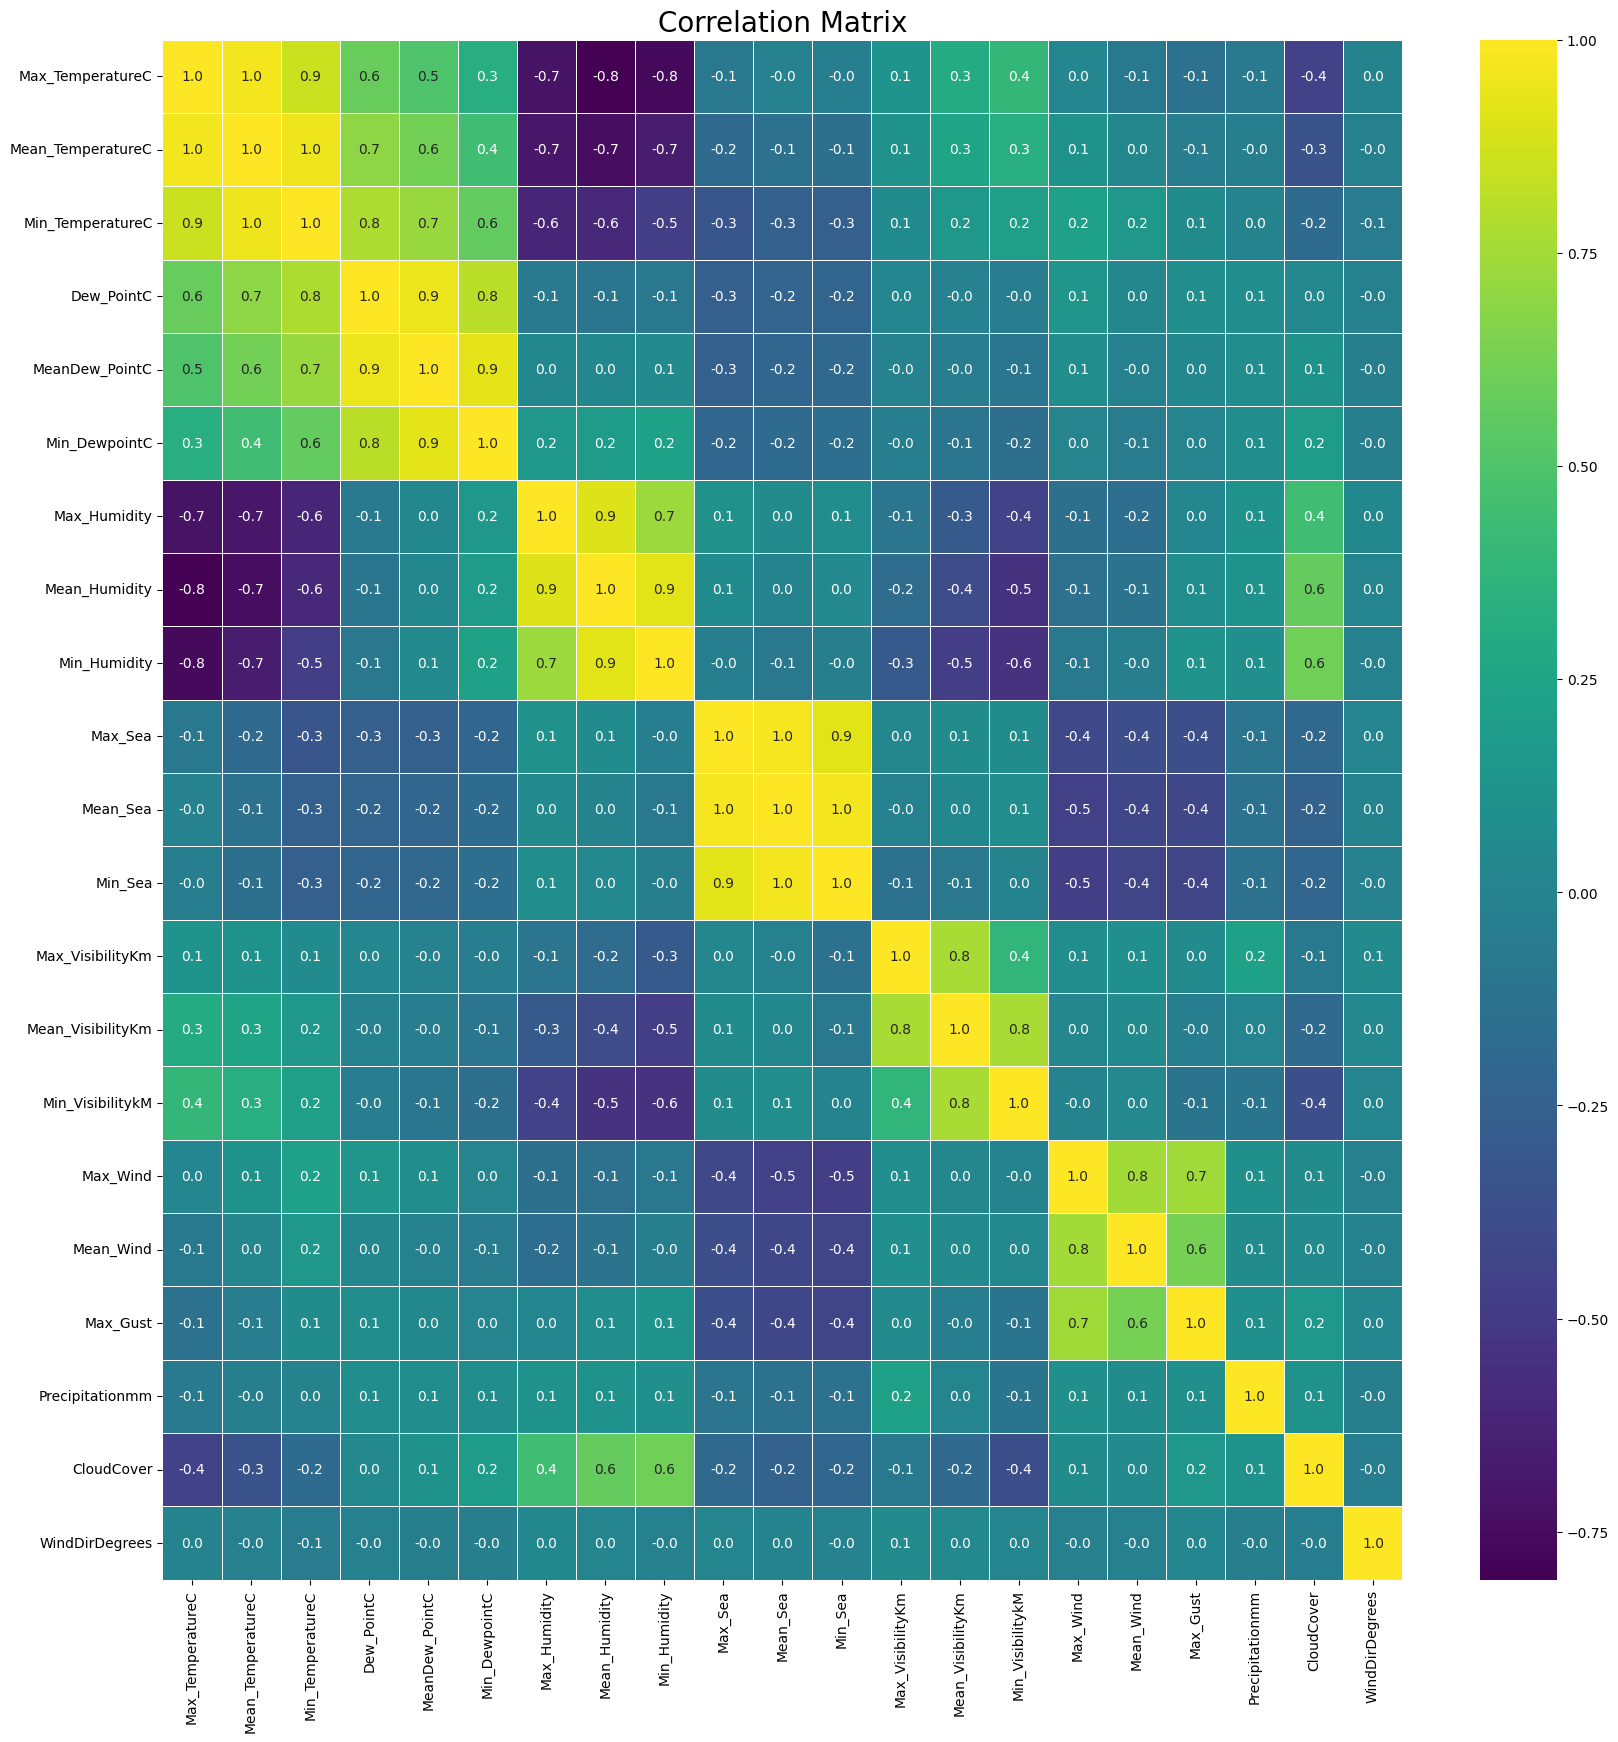

In [127]:
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(data.corr(),annot = True, linewidths = 0.5, fmt = ".1f", ax = ax, cmap = "viridis")
plt.title('Correlation Matrix', size=20)
plt.show()


### Heatmap using Mean Temperatures

It is a graphical representation that uses colors to visualize data on a two-dimensional plane. It provides a visual summary of numerical values by assigning colors to different intensity levels. It helps to analyze patterns, relationships, and distributions within datasets. They are particularly useful in exploratory data analysis, as they allow analysts to quickly identify areas of high or low values, clusters, or anomalies. Heatmaps enable effective data visualization, aiding in decision-making processes, identifying trends, and highlighting areas that require further investigation or action, making them a valuable tool.

<ipython-input-128-6766a4dbb77e>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dt_temp_sns = dt_temp.pivot("year", "dayofyear", 'Mean_TemperatureC')


Text(0.5, 1.0, 'Heat map with Average Temperatures (1997-2015)')

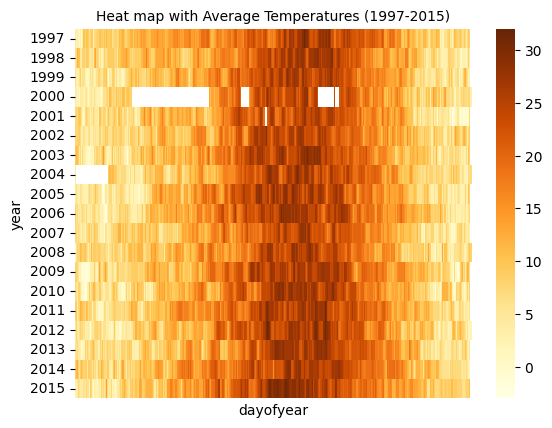

In [128]:
# Heat map with average temperatures by day of the year from 1997 to 2015
dt_temp = data.copy()

# Convert to date
dt_temp.CET = pd.to_datetime(dt_temp.CET, format='%Y-%m-%d')
dt_temp['year'] = dt_temp.CET.dt.year
dt_temp['dayofyear'] = dt_temp.CET.dt.dayofyear
dt_temp_sns = dt_temp.pivot("year", "dayofyear", 'Mean_TemperatureC')
sns.heatmap(dt_temp_sns, xticklabels=False, cmap="YlOrBr")
plt.title('Heat map with Average Temperatures (1997-2015)', size=10)

### First Issue: Amount of Null Values

In this case, only the events that have a value are shown, with a total of 1798 events. Considering that the total should be 6812, then there is a total of 5014 null values in the Events column. In addition, there are events that occurred a few times over the years (considering that the measurements go from 1997 to 2015), so there are events that can affect the analysis and must be considered from another perspective.

In [129]:
data['Events'].value_counts()#.nlargest(5)

Rain                      1140
Rain-Thunderstorm          247
Fog                        233
Fog-Rain                    69
Thunderstorm                45
Rain-Snow                   33
Snow                        14
Rain-Hail-Thunderstorm       7
Fog-Snow                     4
Fog-Thunderstorm             1
Tornado                      1
Fog-Rain-Thunderstorm        1
Fog-Rain-Snow                1
Rain-Snow-Thunderstorm       1
Rain-Hail                    1
Name: Events, dtype: int64

### Main Challenges

- Class Imbalance
If there is a significant disproportion in the distribution of the target classes, the model may have difficulty learning patterns from the minority classes, as it will be biased towards the majority classes.

- Null Values
If these values are not handled properly, important information for the analysis can be lost and the model can be negatively affected.

- Modeling
Depending on the nature of the problem and the data available, some modeling algorithms may work better than others. It is important to do a thorough exploration and evaluation of different algorithms to find the most suitable one.

### Preliminar Dataset Manipulation (Null Values and Data Types)

In [130]:
# Question 1
# What is the column with the most non-null data?

data.isnull().sum().sort_values()

CET                     0
Precipitationmm         0
Mean_Wind               0
Max_Wind                0
Min_Sea                 0
Max_Sea                 0
Mean_Sea                0
WindDirDegrees          0
Max_Humidity            2
Mean_Humidity           2
Min_Humidity            2
MeanDew_PointC          2
Dew_PointC              2
Min_TemperatureC        2
Max_TemperatureC        2
Min_DewpointC           2
Mean_TemperatureC       3
Max_VisibilityKm      940
Mean_VisibilityKm     940
Min_VisibilitykM      940
CloudCover           1372
Max_Gust             3306
Events               5014
dtype: int64

<Axes: >

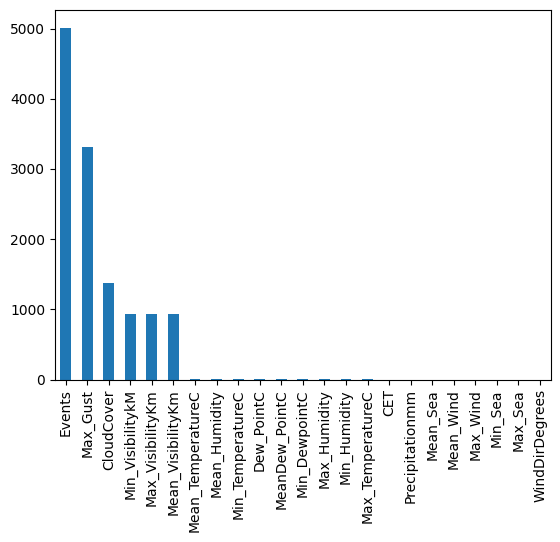

In [131]:
df_nulos = data.isnull().sum().sort_values(ascending=False)
df_nulos.plot(kind='bar')

In [132]:
# Getting the percentages of null values

porcentajes = data.isnull().sum() / data.shape[0] * 100

In [133]:
# New dataframe with percentage of null values per column

df_porcentajes = pd.DataFrame(porcentajes).reset_index()
df_porcentajes.set_axis(['Columnas', 'Porcentaje'], axis='columns', inplace=True)
df_porcentajes_nuevo = df_porcentajes.sort_values(by=['Porcentaje'], ascending=False).reset_index().drop(columns = 'index')
df_porcentajes_nuevo

<ipython-input-133-6fe4999c1a55>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_porcentajes.set_axis(['Columnas', 'Porcentaje'], axis='columns', inplace=True)


,Columnas,Porcentaje
0,Events,73.605402
1,Max_Gust,48.532002
2,CloudCover,20.140928
3,Min_VisibilitykM,13.799178
4,Max_VisibilityKm,13.799178
5,Mean_VisibilityKm,13.799178
6,Mean_TemperatureC,0.044040
7,Mean_Humidity,0.029360
8,Min_TemperatureC,0.029360
9,Dew_PointC,0.029360


<Axes: xlabel='Columnas'>

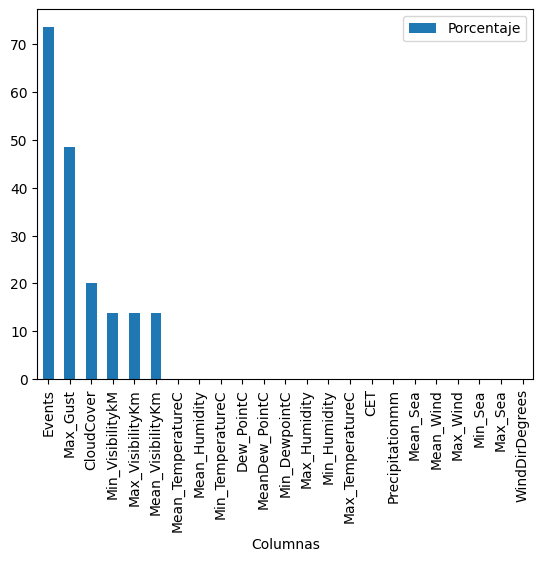

In [134]:
df_porcentajes_plot = df_porcentajes_nuevo.copy()
df_porcentajes_plot.set_index('Columnas', inplace=True)
df_porcentajes_plot.plot(kind='bar')

In [135]:
data['CET'] = pd.to_datetime(data['CET'])

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CET                6812 non-null   datetime64[ns]
 1   Max_TemperatureC   6810 non-null   float64       
 2   Mean_TemperatureC  6809 non-null   float64       
 3   Min_TemperatureC   6810 non-null   float64       
 4   Dew_PointC         6810 non-null   float64       
 5   MeanDew_PointC     6810 non-null   float64       
 6   Min_DewpointC      6810 non-null   float64       
 7   Max_Humidity       6810 non-null   float64       
 8   Mean_Humidity      6810 non-null   float64       
 9   Min_Humidity       6810 non-null   float64       
 10  Max_Sea            6812 non-null   int64         
 11  Mean_Sea           6812 non-null   int64         
 12  Min_Sea            6812 non-null   int64         
 13  Max_VisibilityKm   5872 non-null   float64       
 14  Mean_Vis

In [137]:
# Question 2
# What is the most common event during the period 2010-2015?

df_10_15 = []
df_10_15 = data[(data['CET'] >= '2010-1-1') & (data['CET'] <= '2015-12-31')]
df_10_15

,CET,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees
4621,2010-01-01,9.0,7.0,4.0,5.0,2.0,1.0,81.0,77.0,66.0,...,10.0,10.0,10.0,47,27,69.0,0.00,3.0,NaN,241
4622,2010-01-02,8.0,6.0,3.0,5.0,3.0,0.0,100.0,84.0,66.0,...,10.0,9.0,2.0,16,8,NaN,0.00,5.0,Fog,196
4623,2010-01-03,8.0,4.0,2.0,6.0,4.0,2.0,100.0,90.0,76.0,...,10.0,7.0,3.0,11,2,NaN,0.00,5.0,Rain,347
4624,2010-01-04,10.0,8.0,7.0,9.0,7.0,6.0,100.0,94.0,87.0,...,10.0,5.0,2.0,13,6,NaN,0.00,6.0,Rain,349
4625,2010-01-05,11.0,8.0,6.0,8.0,7.0,4.0,100.0,89.0,76.0,...,10.0,9.0,5.0,8,3,NaN,0.00,6.0,Rain,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190
6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,70.0,...,19.0,10.0,6.0,14,5,34.0,0.00,6.0,NaN,256


In [138]:
df_10_15['Events'].value_counts()#.nlargest(5)

Rain                      399
Fog                        71
Rain-Thunderstorm          70
Fog-Rain                   29
Rain-Snow                  16
Thunderstorm               10
Snow                        4
Rain-Hail-Thunderstorm      4
Fog-Snow                    1
Rain-Snow-Thunderstorm      1
Rain-Hail                   1
Name: Events, dtype: int64

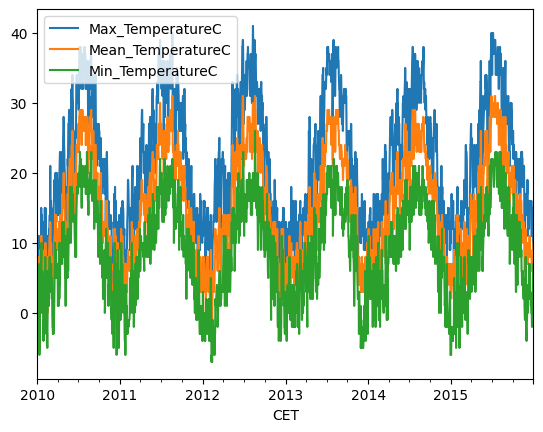

In [139]:
# Question 3
# How does the average, minimum and maximum temperature behave in the period 2010-2015?
# Is it periodic, has it been increasing?

df_10_15.plot(x="CET", y=["Max_TemperatureC", "Mean_TemperatureC", "Min_TemperatureC"])
plt.show()

In [140]:
# Question 4
# What is the most common event for each month of the year?

# Is it the entire dataframe or just 2010 to 2015?
# Considering the entire dataframe for the moment, otherwise change 'data' to 'df_10_15'

#data.groupby(data.CET.dt.month)['Events'].value_counts()
data['Year'] = pd.to_datetime(data['CET']).dt.year
data['Month'] = pd.to_datetime(data['CET']).dt.month
data_gb_year_month = data.groupby(['Year', 'Month'])['Events'].value_counts().to_frame()
data_gb_year_month.head(30)  # Remove .head(30) to show all


Events
Year Month Events                   
1997 1     Rain                   11
           Fog                     3
           Snow                    2
           Rain-Snow               1
     2     Fog                     3
           Fog-Rain                3
     4     Rain                    7
           Rain-Thunderstorm       1
     5     Rain                    8
           Rain-Thunderstorm       6
     6     Rain                    5
           Rain-Thunderstorm       1
     7     Rain-Thunderstorm      10
           Rain                    2
           Thunderstorm            2
     8     Rain-Thunderstorm       4
           Rain                    3
           Thunderstorm            2
     9     Rain-Thunderstorm       4
           Rain                    1
     10    Rain                    6
           Fog                     1
     11    Rain                   16
           Fog                     6
           Fog-Rain                1
     12    Rain                    7
           Fog                     6
           Fog-Rain                4
           Rain-Snow               1
           Snow                    1

In [141]:
# Question 5
# What has been the year with extreme events (i.e. events that have occurred less than 5 times in total?

data_gb_year = data.copy().groupby('Year')['Events'].value_counts().loc[lambda x : x<=5].to_frame()
data_gb_year

Events
Year Events                        
1997 Thunderstorm                 4
     Snow                         3
     Rain-Snow                    2
1998 Fog-Rain                     2
     Fog-Thunderstorm             1
...                             ...
2014 Rain-Hail-Thunderstorm       1
2015 Fog-Rain                     4
     Rain-Snow                    3
     Rain-Hail                    1
     Snow                         1

[66 rows x 1 columns]

<Axes: xlabel='Year,Events'>

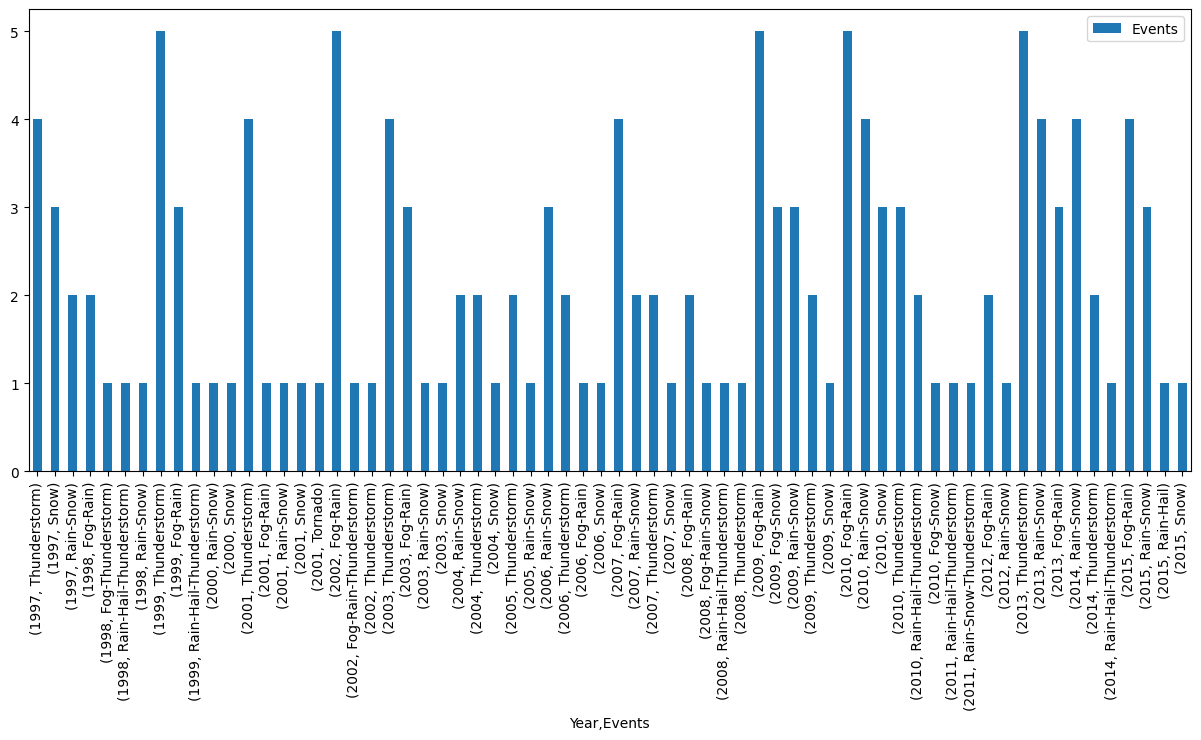

In [142]:
data_gb_year.plot(kind='bar', figsize=(15, 6))

In [143]:
# Question 6
# On which day was Wind Gust the highest velocity?
# Generates one graph per month and one per year for the average amounts

data['Max_Gust'].max()

103.0

In [144]:
maxGust = data['Max_Gust'].idxmax()
data.loc[[maxGust]]

,CET,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month
309,1997-11-06,16.0,11.0,6.0,12.0,5.0,1.0,88.0,70.0,54.0,...,5.0,58,27,103.0,0.0,5.0,Rain,224,1997,11


In [145]:
data_p6 = data.copy()
data_p6 = data_p6.reset_index()
data_p6

,index,CET,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month
0,0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,...,4.0,13,6,NaN,0.00,6.0,NaN,229,1997,1
1,1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,...,4.0,26,8,47.0,0.00,5.0,Rain,143,1997,1
2,2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,...,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256,1997,1
3,3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,...,10.0,27,19,40.0,0.00,2.0,NaN,284,1997,1
4,4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,...,1.0,14,6,NaN,0.00,7.0,Snow,2,1997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,...,5.0,14,6,NaN,0.00,8.0,Fog,38,2015,12
6808,6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,...,8.0,27,8,45.0,0.51,7.0,Rain,243,2015,12
6809,6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,...,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190,2015,12
6810,6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,...,6.0,14,5,34.0,0.00,6.0,NaN,256,2015,12


In [146]:
data_p6.set_index('CET',inplace=True)
data_p6.index.month
data_p6 = data_p6.groupby(data_p6.index.month, as_index=False).Mean_Wind.mean()
data_p6 = data_p6.rename_axis(None, axis=1).rename_axis('Month', axis=0).reset_index()

In [147]:
data_p6.drop(columns = 'Month')
data_p6.rename_axis(None, axis=1).rename_axis('Month', axis=0)
data_p6["Month"] = data_p6["Month"] + 1
data_p6

,Month,Mean_Wind
0,1,8.465116
1,2,9.255198
2,3,10.078853
3,4,10.605556
4,5,9.281570
5,6,9.724199
6,7,9.865874
7,8,9.527145
8,9,8.570175
9,10,8.232598


In [148]:
data_p6_2 = data.copy()
data_p6_2 = data_p6_2.reset_index()
data_p6_2

,index,CET,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month
0,0,1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,...,4.0,13,6,NaN,0.00,6.0,NaN,229,1997,1
1,1,1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,...,4.0,26,8,47.0,0.00,5.0,Rain,143,1997,1
2,2,1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,...,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256,1997,1
3,3,1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,...,10.0,27,19,40.0,0.00,2.0,NaN,284,1997,1
4,4,1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,...,1.0,14,6,NaN,0.00,7.0,Snow,2,1997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,6807,2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,...,5.0,14,6,NaN,0.00,8.0,Fog,38,2015,12
6808,6808,2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,...,8.0,27,8,45.0,0.51,7.0,Rain,243,2015,12
6809,6809,2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,...,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190,2015,12
6810,6810,2015-12-30,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,...,6.0,14,5,34.0,0.00,6.0,NaN,256,2015,12


In [149]:
data_p6_2['Year'] = data_p6_2['Year'].astype(str).astype(int)
data_p6_2['Year'] = data_p6_2['CET'].dt.strftime('%Y')
data_p6_2['Year'] = data_p6_2['Year'].astype(str).astype(int)
initial_year = data_p6_2.iloc[0]['Year']

In [150]:
data_p6_2.set_index('CET',inplace=True)
data_p6_2.index.year
data_p6_2 = data_p6_2.groupby(data_p6_2.index.year, as_index=False).Mean_Wind.mean()
data_p6_2 = data_p6_2.rename_axis(None, axis=1).rename_axis('Year', axis=0).reset_index()
data_p6_2["Year"] = data_p6_2["Year"] + initial_year
data_p6_2

,Year,Mean_Wind
0,1997,7.490411
1,1998,8.460274
2,1999,9.260274
3,2000,8.052045
4,2001,9.030137
5,2002,8.446575
6,2003,9.035616
7,2004,8.666667
8,2005,9.802740
9,2006,9.531507


In [151]:
data['Mean_Wind'] = data['Mean_Wind'].astype(str).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CET                6812 non-null   datetime64[ns]
 1   Max_TemperatureC   6810 non-null   float64       
 2   Mean_TemperatureC  6809 non-null   float64       
 3   Min_TemperatureC   6810 non-null   float64       
 4   Dew_PointC         6810 non-null   float64       
 5   MeanDew_PointC     6810 non-null   float64       
 6   Min_DewpointC      6810 non-null   float64       
 7   Max_Humidity       6810 non-null   float64       
 8   Mean_Humidity      6810 non-null   float64       
 9   Min_Humidity       6810 non-null   float64       
 10  Max_Sea            6812 non-null   int64         
 11  Mean_Sea           6812 non-null   int64         
 12  Min_Sea            6812 non-null   int64         
 13  Max_VisibilityKm   5872 non-null   float64       
 14  Mean_Vis

Text(0.5, 1.0, 'Average By Month and Years')

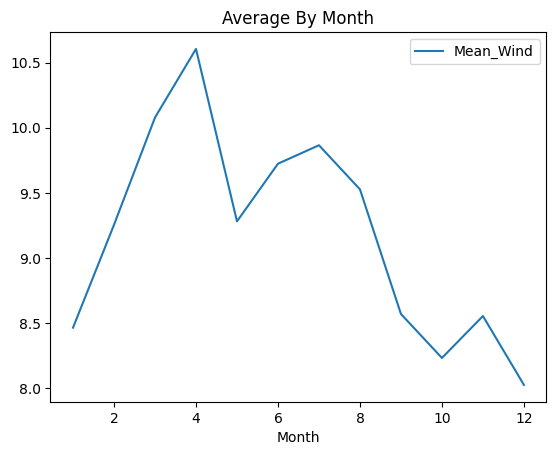

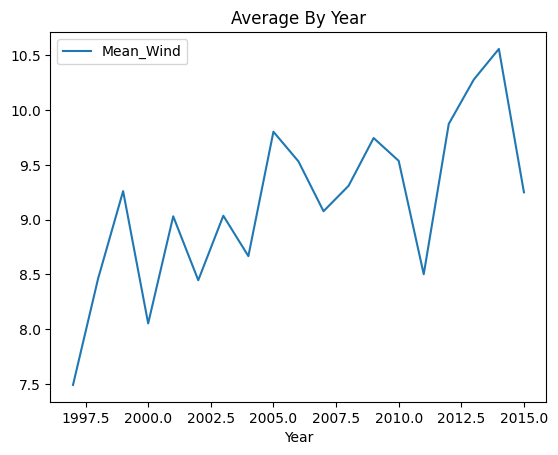

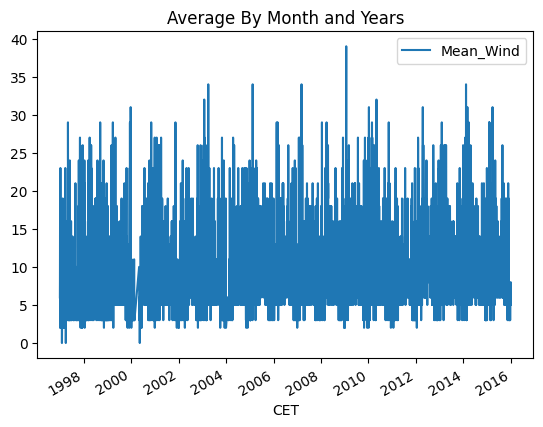

In [152]:
data_p6.plot(x="Month", y="Mean_Wind").set_title('Average By Month')
data_p6_2.plot(x="Year", y="Mean_Wind").set_title('Average By Year')
data.plot(x="CET", y="Mean_Wind").set_title('Average By Month and Years')

In [153]:
# Question 7
# What would be the month with the highest temperature to visit?

data_p7 = []
data_p7 = data.copy()
data_p7 = data_p7.reset_index()

In [154]:
data_p7.set_index('CET',inplace=True)
data_p7.index.month
data_p7 = data_p7.groupby(data_p7.index.month, as_index=False).Max_TemperatureC.mean()
data_p7 = data_p7.rename_axis(None, axis=1).rename_axis('Month', axis=0).reset_index()
data_p7["Month"] = data_p7["Month"] + 1
data_p7

,Month,Max_TemperatureC
0,1,10.588551
1,2,12.752363
2,3,16.526882
3,4,19.168519
4,5,23.455631
5,6,29.723214
6,7,33.003396
7,8,32.572680
8,9,27.550877
9,10,21.032258


<Axes: xlabel='Year,Month,Events'>

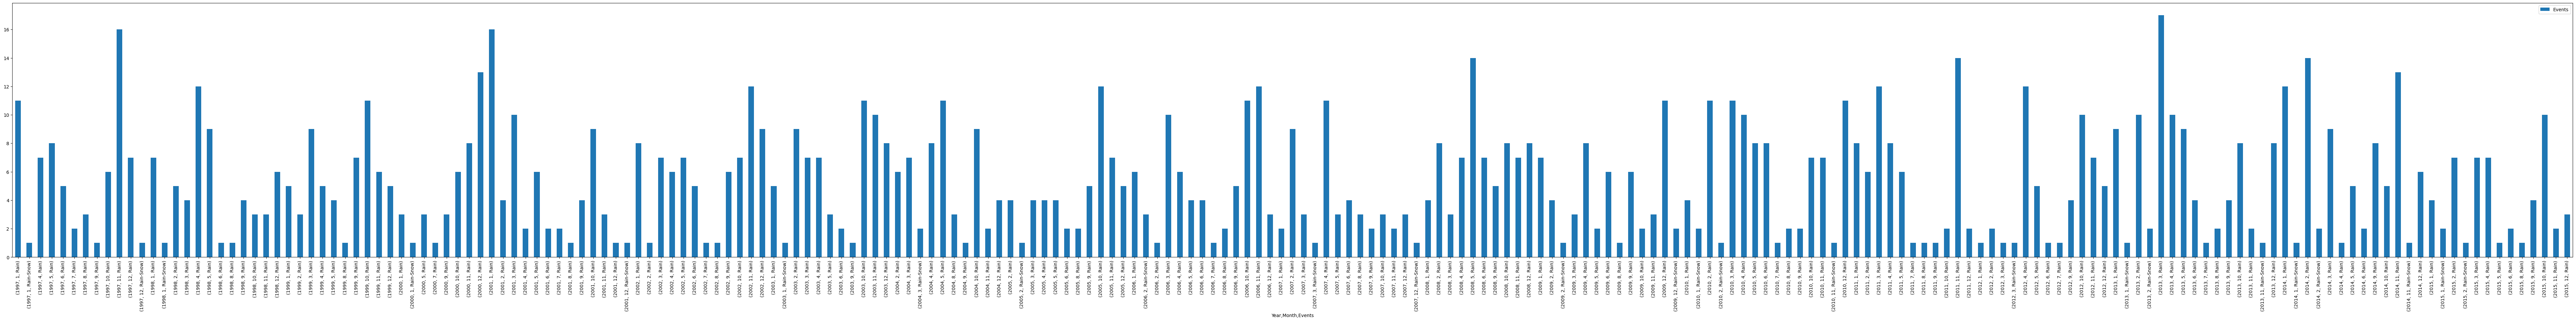

In [155]:
data_gb_year_month_2 = data.copy()
data_gb_year_month_2 = data_gb_year_month_2[(data_gb_year_month_2['Events']=='Rain') | (data_gb_year_month_2['Events']=='Rain-Snow')]
data_gb_year_month_2 = data_gb_year_month_2.groupby(['Year', 'Month'])['Events'].value_counts().to_frame()
data_gb_year_month_2.plot(kind='bar', figsize=(100, 10))

In [156]:
data_p7_2 = data.copy()
data_p7_2 = data_p7_2.reset_index()
data_p7_2['Month'] = data_p7_2['Month'].astype(str).astype(int)
data_p7_2['Year'] = data_p7_2['CET'].dt.strftime('%Y')
data_p7_2['Year'] = data_p7_2['Year'].astype(str).astype(int)
initial_year = data_p7_2.iloc[0]['Month']
data_p7_2.set_index('CET',inplace=True)
data_p7_2.index.month
data_p7_2 = data_p7_2[(data_p7_2['Events']=='Rain')] #| (data_p7_2['Events']=='Rain-Snow')]
data_p7_2

,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,4.0,26,8,47.0,0.00,5.0,Rain,143,1997,1
1997-01-08,7,8.0,4.0,1.0,7.0,4.0,1.0,100.0,96.0,87.0,...,4.0,26,8,NaN,0.00,7.0,Rain,273,1997,1
1997-01-09,8,12.0,10.0,8.0,8.0,3.0,0.0,100.0,65.0,44.0,...,10.0,48,23,48.0,0.00,4.0,Rain,274,1997,1
1997-01-15,14,11.0,8.0,5.0,7.0,5.0,4.0,100.0,83.0,62.0,...,8.0,10,3,NaN,0.00,6.0,Rain,16,1997,1
1997-01-17,16,13.0,9.0,5.0,9.0,5.0,1.0,100.0,78.0,47.0,...,7.0,27,13,NaN,0.00,4.0,Rain,267,1997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-02,6752,15.0,13.0,11.0,12.0,9.0,8.0,95.0,80.0,54.0,...,4.0,27,11,48.0,11.94,6.0,Rain,132,2015,11
2015-11-03,6753,15.0,12.0,9.0,11.0,10.0,8.0,94.0,84.0,70.0,...,2.0,19,13,48.0,0.51,6.0,Rain,174,2015,11
2015-12-14,6794,15.0,11.0,7.0,9.0,6.0,5.0,100.0,76.0,43.0,...,3.0,14,3,40.0,0.00,5.0,Rain,190,2015,12


In [157]:
data_p7_3 = data_p7_2.groupby(data_p7_2.index.month, as_index=False).Events.size()
data_p7_3.rename(columns = {'CET':'Month', 'size':'Count'}, inplace = True)
data_p7_3

,Month,Count
0,1,112
1,2,104
2,3,124
3,4,131
4,5,112
5,6,55
6,7,11
7,8,24
8,9,73
9,10,140


In [158]:
data_p7_3.sort_values(by=['Count'], ascending=False).reset_index().drop(columns=["index"])

,Month,Count
0,10,140
1,11,136
2,4,131
3,3,124
4,12,118
5,1,112
6,5,112
7,2,104
8,9,73
9,6,55


In [159]:
data_p7_3["Mean_Temperature"] = data_p7["Max_TemperatureC"]
data_p7_3.sort_values(by=['Mean_Temperature'], ascending=False).reset_index().drop(columns=["index"])

,Month,Count,Mean_Temperature
0,7,11,33.003396
1,8,24,32.572680
2,6,55,29.723214
3,9,73,27.550877
4,5,112,23.455631
5,10,140,21.032258
6,4,131,19.168519
7,3,124,16.526882
8,11,136,14.270175
9,2,104,12.752363


In [160]:
# Do these two events contradict each other?
# Not in this case, since the months where there is a higher temperature coincide with the months where there is less possibility of rain
# June = 6
# July = 7
# August = 8

In [161]:
# Question 8
# Generate a graph of the average temperature per
# month where it is possible to distinguish which days were
# rainy and which days were not.

data_p8 = data_p7_3.sort_values(by=['Month'], ascending=True).reset_index().drop(columns=["index"])
data_p8.rename(columns = {'Count':'Rain_Count'}, inplace = True)
data_p8

,Month,Rain_Count,Mean_Temperature
0,1,112,10.588551
1,2,104,12.752363
2,3,124,16.526882
3,4,131,19.168519
4,5,112,23.455631
5,6,55,29.723214
6,7,11,33.003396
7,8,24,32.572680
8,9,73,27.550877
9,10,140,21.032258


Text(0.5, 1.0, 'Rain Count vs Temperature')

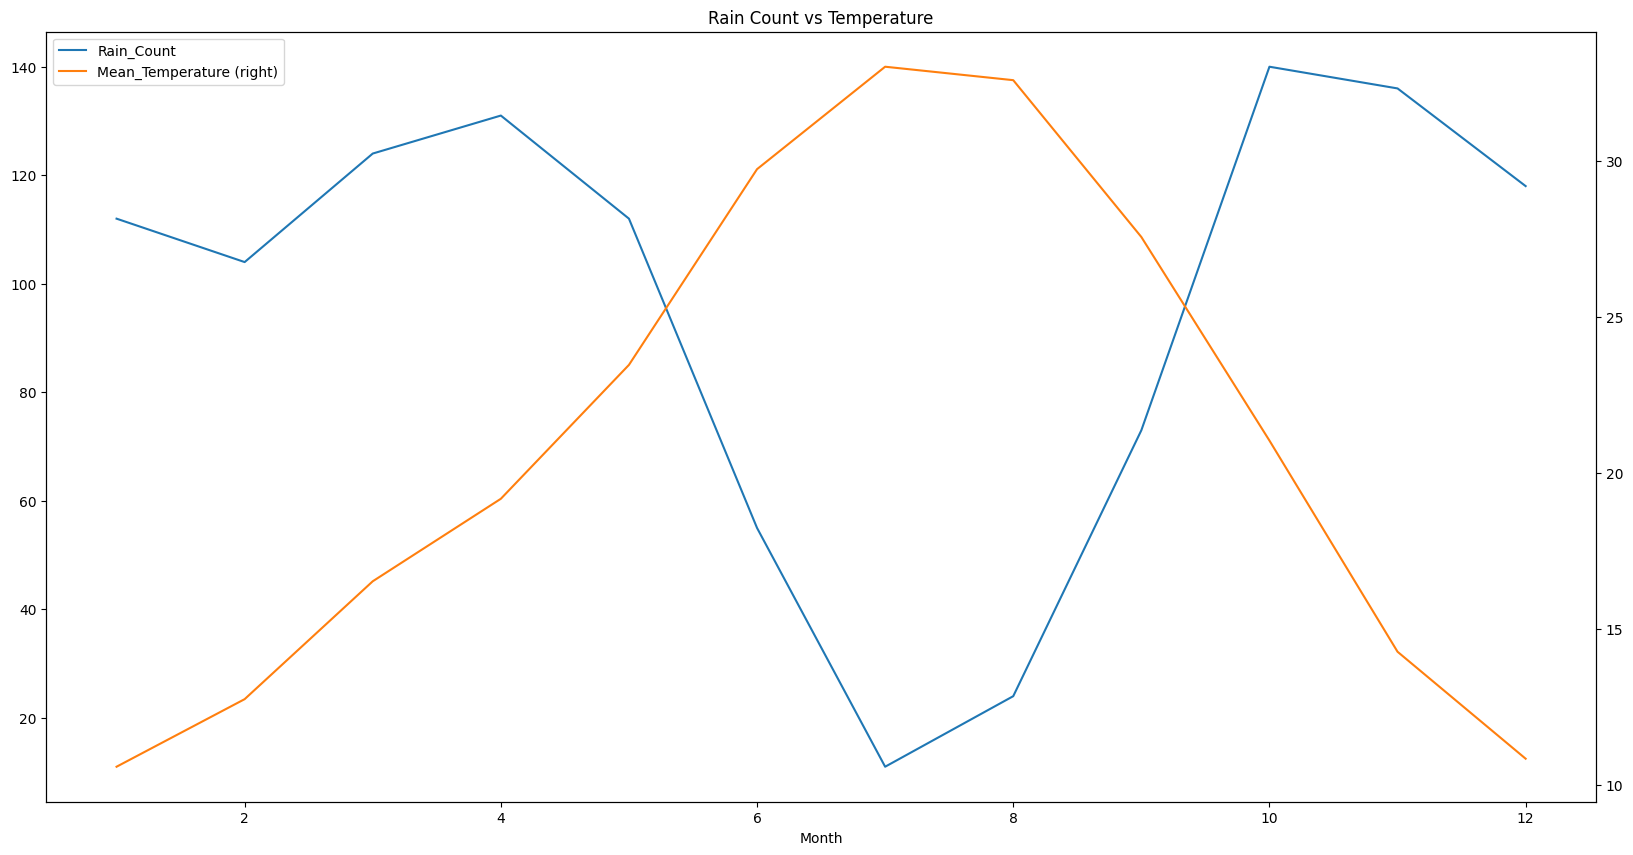

In [162]:
fig, ax = plt.subplots(figsize=(20,10))
data_p8.plot(x = 'Month', y = 'Rain_Count', ax = ax)
data_p8.plot(x = 'Month', y = 'Mean_Temperature', ax = ax, secondary_y = True).set_title('Rain Count vs Temperature')

In [163]:
# Question 9
# How does visibility (in km) compare for
# days with fog (foggy days) and clear days?

data_p9 = []
data_p9 = data.copy()
data_p9 = data_p9.reset_index()
data_p9.set_index('CET',inplace=True)
data_p9.index.month
data_p9 = data_p9.groupby(data_p9.index.month, as_index=False).Mean_VisibilityKm.mean()
data_p9 = data_p9.rename_axis(None, axis=1).rename_axis('Month', axis=0).reset_index()
data_p9["Month"] = data_p9["Month"] + 1
data_p9

,Month,Mean_VisibilityKm
0,1,9.774648
1,2,10.297539
2,3,11.369710
3,4,11.683570
4,5,12.297248
5,6,12.723447
6,7,13.511530
7,8,13.494692
8,9,12.626582
9,10,11.840954


In [164]:
data_p9_2 = data.copy()
data_p9_2 = data_p9_2.reset_index()
data_p9_2['Month'] = data_p9_2['Month'].astype(str).astype(int)
data_p9_2['Year'] = data_p9_2['CET'].dt.strftime('%Y')
data_p9_2['Year'] = data_p9_2['Year'].astype(str).astype(int)
#data_p9_2["Events"] = data_p9_2["Events"].fillna("Clear")   # Posible quitar .fillna("Clear")  ?
#initial_year = data_p9_2.iloc[0]['Month']
data_p9_2.set_index('CET',inplace=True)
data_p9_2.index.month
data_p9_2 = data_p9_2[(data_p9_2['Events']=='Fog') | (data_p9_2['Events']=='Fog-Rain')] #| (data_p9_2['Events']=='Clear')]
data_p9_2['Events'].value_counts()

Fog         233
Fog-Rain     69
Name: Events, dtype: int64

In [165]:
data_p9_3 = data_p9_2.groupby(data_p9_2.index.month, as_index=False).Events.size()
#data_p7_3 = data_p9_2.rename_axis(None, axis=1).rename_axis('Month', axis=0).reset_index()
data_p9_3.rename(columns = {'CET':'Month', 'size':'Count'}, inplace = True)
data_p9_3

,Month,Count
0,1,77
1,2,33
2,3,13
3,4,6
4,5,9
5,8,1
6,9,2
7,10,21
8,11,53
9,12,87


In [166]:
data_p9_3["Mean_VisibilityKm"] = data_p9["Mean_VisibilityKm"]
data_p9_3.sort_values(by=['Mean_VisibilityKm'], ascending=False).reset_index().drop(columns=["index"])

,Month,Count,Mean_VisibilityKm
0,9,2,13.511530
1,10,21,13.494692
2,8,1,12.723447
3,11,53,12.626582
4,5,9,12.297248
5,12,87,11.840954
6,4,6,11.683570
7,3,13,11.369710
8,2,33,10.297539
9,1,77,9.774648


In [167]:
data_p9_4 = data_p9_3.sort_values(by=['Month'], ascending=True).reset_index().drop(columns=["index"])
data_p9_4.rename(columns = {'Count':'Fog_Count'}, inplace = True)
data_p9_4

,Month,Fog_Count,Mean_VisibilityKm
0,1,77,9.774648
1,2,33,10.297539
2,3,13,11.369710
3,4,6,11.683570
4,5,9,12.297248
5,8,1,12.723447
6,9,2,13.511530
7,10,21,13.494692
8,11,53,12.626582
9,12,87,11.840954


Text(0.5, 1.0, 'Visibility vs Fog')

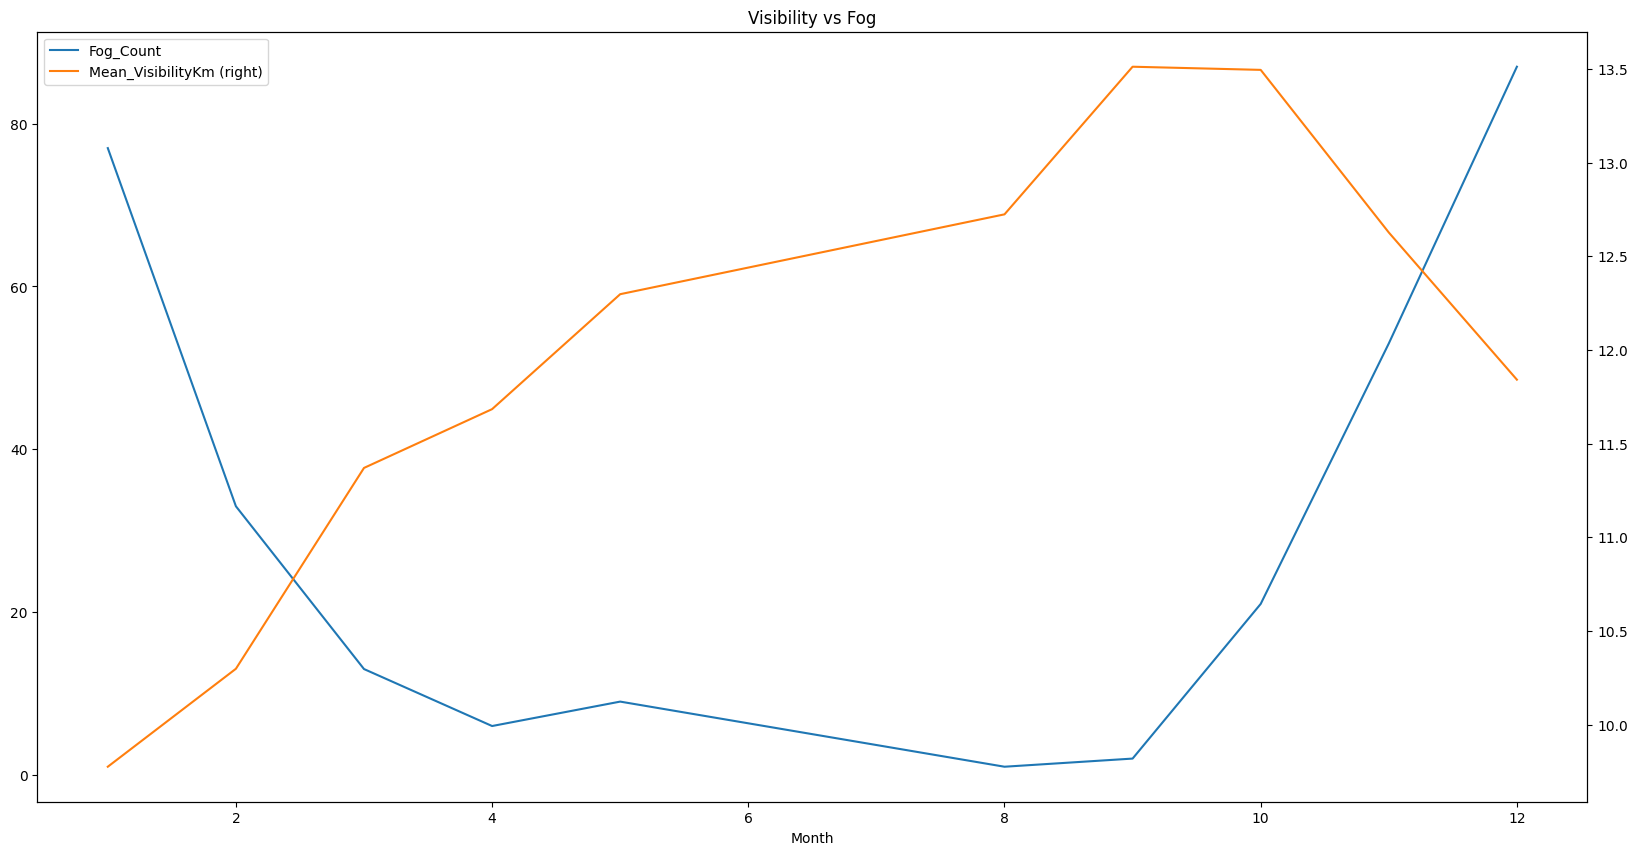

In [168]:
fig, ax = plt.subplots(figsize=(20,10))
data_p9_4.plot(x = 'Month', y = 'Fog_Count', ax = ax)
data_p9_4.plot(x = 'Month', y = 'Mean_VisibilityKm', ax = ax, secondary_y = True).set_title('Visibility vs Fog')

## Data Transformation

In this case, null data was manipulated in the events column to take them as "Nothing", in which, for their interpretation, they are considered as sunny days. It is possible to find that most of the days were sunny, however, there is also a high occurrence of days with rain, being the second largest event over the years. In order to have a better analysis, a group was made for all those events that occurred less than 15 times in the entire dataset, being changed by a new value called "Extreme".

It was also found that there were null values in other columns, however, they were mostly in 2 columns, so depending on the percentage it would be possible to simply remove them from the dataset and possibly not affect the behavior of the model as much by doing so. In this case, the main change was to remove null values from the Max Gust column. On the other hand, for the Cloud Cover values it was possible to use the average of this same column, since there were only 12 null values, reducing a possible bias from this type of approximation.

In [169]:
# Question 10
# There are a lot of null values in the table.
# Which ones would you clean and which ones would you not?

# In the Events column, when nothing happens, it appears as NaN.
# We are going to change those elements to have a “Nothing” tag.

data_p10 = []
data_p10 = data.copy()
data_p10 = data_p10.reset_index()
data_p10['Month'] = data_p10['Month'].astype(str).astype(int)
data_p10['Year'] = data_p10['CET'].dt.strftime('%Y')
data_p10['Year'] = data_p10['Year'].astype(str).astype(int)
data_p10.set_index('CET',inplace=True)
data_p10

,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-01,0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,4.0,13,6,NaN,0.00,6.0,NaN,229,1997,1
1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,4.0,26,8,47.0,0.00,5.0,Rain,143,1997,1
1997-01-03,2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256,1997,1
1997-01-04,3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,27,19,40.0,0.00,2.0,NaN,284,1997,1
1997-01-05,4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,1.0,14,6,NaN,0.00,7.0,Snow,2,1997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,5.0,14,6,NaN,0.00,8.0,Fog,38,2015,12
2015-12-28,6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,8.0,27,8,45.0,0.51,7.0,Rain,243,2015,12
2015-12-29,6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190,2015,12


In [170]:
data_p10["Events"] = data_p10["Events"].fillna("Nothing")
data_p10

,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Min_VisibilitykM,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-01,0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,4.0,13,6,NaN,0.00,6.0,Nothing,229,1997,1
1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,4.0,26,8,47.0,0.00,5.0,Rain,143,1997,1
1997-01-03,2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256,1997,1
1997-01-04,3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,10.0,27,19,40.0,0.00,2.0,Nothing,284,1997,1
1997-01-05,4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,1.0,14,6,NaN,0.00,7.0,Snow,2,1997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,5.0,14,6,NaN,0.00,8.0,Fog,38,2015,12
2015-12-28,6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,8.0,27,8,45.0,0.51,7.0,Rain,243,2015,12
2015-12-29,6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190,2015,12


In [171]:
data_NA = []
data_NA = data.copy()
data_NA = data_NA.reset_index()
data_NA = data_NA.dropna()

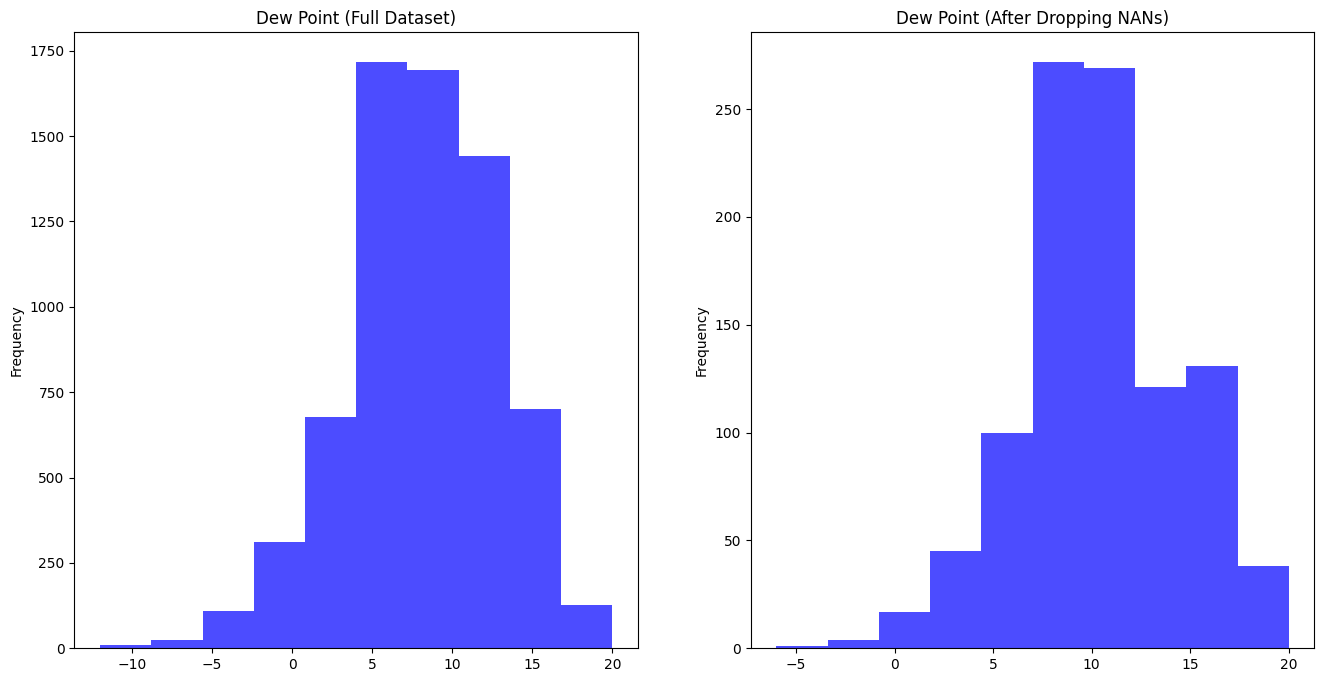

In [172]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
data_p10["Dew_PointC"].plot(kind = "hist", bins = 10, figsize = (16,8), color = "b", alpha = 0.7)
plt.title("Dew Point (Full Dataset)")

plt.subplot(1, 2, 2) # row 1, col 2 index 2
data_NA["Dew_PointC"].plot(kind = "hist", bins = 10, figsize = (16,8), color = "b", alpha = 0.7)
plt.title("Dew Point (After Dropping NANs)")

plt.show()

In [173]:
# Question 11
# Create a limit, at your discretion, that determines when these
# events need to be named in a new category, called “Extreme”.

data_p11 = []
data_p11 = data_p10.copy()
data_p11 = data_p11.reset_index()
data_p11['Month'] = data_p11['Month'].astype(str).astype(int)
data_p11['Year'] = data_p11['CET'].dt.strftime('%Y')
data_p11['Year'] = data_p11['Year'].astype(str).astype(int)
data_p11.set_index('CET',inplace=True)
data_p11["Events_Occurrence_Total"] = 0
data_p11


,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month,Events_Occurrence_Total
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-01,0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,13,6,NaN,0.00,6.0,Nothing,229,1997,1,0
1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,26,8,47.0,0.00,5.0,Rain,143,1997,1,0
1997-01-03,2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,27,19,NaN,0.00,6.0,Rain-Snow,256,1997,1,0
1997-01-04,3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,27,19,40.0,0.00,2.0,Nothing,284,1997,1,0
1997-01-05,4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,14,6,NaN,0.00,7.0,Snow,2,1997,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,14,6,NaN,0.00,8.0,Fog,38,2015,12,0
2015-12-28,6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,27,8,45.0,0.51,7.0,Rain,243,2015,12,0
2015-12-29,6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,14,8,32.0,2.03,5.0,Fog-Rain,190,2015,12,0


In [174]:
data_p11['Events_Occurrence_Total'] = data_p11['Events'].map(data_p11['Events'].value_counts())
data_p11

,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_Wind,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month,Events_Occurrence_Total
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-01,0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,13,6,NaN,0.00,6.0,Nothing,229,1997,1,5014
1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,26,8,47.0,0.00,5.0,Rain,143,1997,1,1140
1997-01-03,2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,27,19,NaN,0.00,6.0,Rain-Snow,256,1997,1,33
1997-01-04,3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,27,19,40.0,0.00,2.0,Nothing,284,1997,1,5014
1997-01-05,4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,14,6,NaN,0.00,7.0,Snow,2,1997,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,14,6,NaN,0.00,8.0,Fog,38,2015,12,233
2015-12-28,6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,27,8,45.0,0.51,7.0,Rain,243,2015,12,1140
2015-12-29,6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,14,8,32.0,2.03,5.0,Fog-Rain,190,2015,12,69


In [175]:
data_p11['Events'].mask(data_p11['Events_Occurrence_Total'] <= 15 ,'Extreme', inplace=True)
data_p11['Events'].value_counts()

Nothing              5014
Rain                 1140
Rain-Thunderstorm     247
Fog                   233
Fog-Rain               69
Thunderstorm           45
Rain-Snow              33
Extreme                31
Name: Events, dtype: int64

In [176]:
# Question 12

# Checking to clean up nulls, in which events do the most NaN occur?
# Is there any NaN in other columns when you have a normal day (i.e., with Nothing tag?)
# If so, those lines can be omitted and should be removed.

data_p12 = []
data_p12 = data_p11.copy()
data_p12 = data_p12.reset_index()
data_p12.set_index('CET',inplace=True)


In [177]:
data_p12['Nulos'] = data_p12.isnull().sum(axis = 1)
data_p12

,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Wind,Max_Gust,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month,Events_Occurrence_Total,Nulos
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-01,0,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,...,6,NaN,0.00,6.0,Nothing,229,1997,1,5014,1
1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,...,8,47.0,0.00,5.0,Rain,143,1997,1,1140,0
1997-01-03,2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,...,19,NaN,0.00,6.0,Rain-Snow,256,1997,1,33,1
1997-01-04,3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,...,19,40.0,0.00,2.0,Nothing,284,1997,1,5014,0
1997-01-05,4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,...,6,NaN,0.00,7.0,Extreme,2,1997,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,...,6,NaN,0.00,8.0,Fog,38,2015,12,233,1
2015-12-28,6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,...,8,45.0,0.51,7.0,Rain,243,2015,12,1140,0
2015-12-29,6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,...,8,32.0,2.03,5.0,Fog-Rain,190,2015,12,69,0


In [178]:
data_p12_2 = data_p12.groupby('Events').agg({'Nulos': ['sum']})
data_p12_2


,Nulos
,sum
Events,
Extreme,15
Fog,176
Fog-Rain,30
Nothing,6709
Rain,456
Rain-Snow,16
Rain-Thunderstorm,92
Thunderstorm,23


In [179]:
# Question 13

# After removing these values, we should be left with
# null values only in the Max Gust Speed and CloudCover columns.
# Can any of these columns be directly removed?
# Why or why not?
# Remove the Max Gust Speed column and justify why.
# What percentage of NaN does this column have?


NANs = data_p12[(data_p12['Events'] == 'Nothing') & (data_p12['Nulos'] >= 1)].index
data_p12.drop(NANs , inplace=True)
data_p12.isnull().sum().sort_values()

index                        0
Month                        0
Year                         0
WindDirDegrees               0
Events                       0
Precipitationmm              0
Mean_Wind                    0
Max_Wind                     0
Min_VisibilitykM             0
Mean_VisibilityKm            0
Events_Occurrence_Total      0
Min_Sea                      0
Max_VisibilityKm             0
Max_Sea                      0
Min_Humidity                 0
Mean_Humidity                0
Max_Humidity                 0
Min_DewpointC                0
MeanDew_PointC               0
Dew_PointC                   0
Min_TemperatureC             0
Mean_TemperatureC            0
Max_TemperatureC             0
Mean_Sea                     0
Nulos                        0
CloudCover                  12
Max_Gust                   796
dtype: int64

In [180]:
# Getting the percentages of null values

porcentajes_13 = data_p12.isnull().sum() / data_p12.shape[0] * 100
porcentajes_13

index                       0.000000
Max_TemperatureC            0.000000
Mean_TemperatureC           0.000000
Min_TemperatureC            0.000000
Dew_PointC                  0.000000
MeanDew_PointC              0.000000
Min_DewpointC               0.000000
Max_Humidity                0.000000
Mean_Humidity               0.000000
Min_Humidity                0.000000
Max_Sea                     0.000000
Mean_Sea                    0.000000
Min_Sea                     0.000000
Max_VisibilityKm            0.000000
Mean_VisibilityKm           0.000000
Min_VisibilitykM            0.000000
Max_Wind                    0.000000
Mean_Wind                   0.000000
Max_Gust                   21.832145
Precipitationmm             0.000000
CloudCover                  0.329128
Events                      0.000000
WindDirDegrees              0.000000
Year                        0.000000
Month                       0.000000
Events_Occurrence_Total     0.000000
Nulos                       0.000000
d

In [181]:
# New dataframe with percentage of null values per column

df_porcentajes_13 = pd.DataFrame(porcentajes_13).reset_index()
df_porcentajes_13.set_axis(['Columnas', 'Porcentaje'], axis='columns', inplace=True)
df_porcentajes_13 = df_porcentajes_13.sort_values(by=['Porcentaje'], ascending=False).reset_index().drop(columns = 'index')
df_porcentajes_13


<ipython-input-181-22b705a0d64f>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_porcentajes_13.set_axis(['Columnas', 'Porcentaje'], axis='columns', inplace=True)


,Columnas,Porcentaje
0,Max_Gust,21.832145
1,CloudCover,0.329128
2,index,0.000000
3,Mean_VisibilityKm,0.000000
4,Events_Occurrence_Total,0.000000
5,Month,0.000000
6,Year,0.000000
7,WindDirDegrees,0.000000
8,Events,0.000000
9,Precipitationmm,0.000000


<Axes: xlabel='Columnas'>

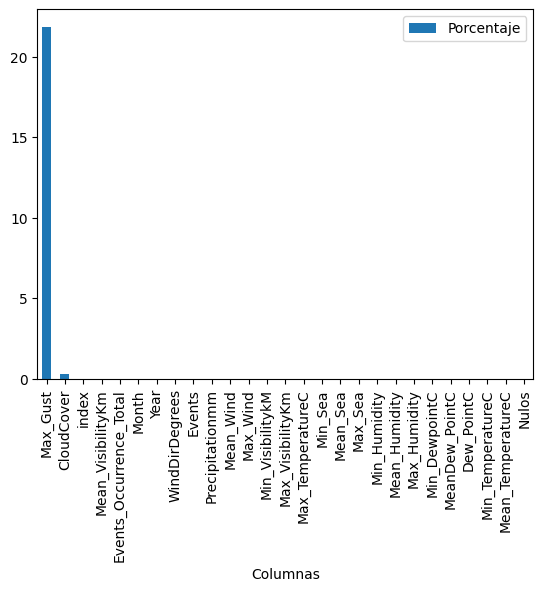

In [182]:
df_porcentajes_13.set_index('Columnas', inplace=True)
df_porcentajes_13.plot(kind='bar')

In [183]:
data_p13_2 = data_p12.copy()
NANs_2 = data_p13_2[(data_p13_2['Events'] == 'Nothing') & (data_p13_2['Nulos'] >= 1)].index
data_p13_2.drop(NANs_2 , inplace=True)
data_p13_2 = data_p13_2.drop('Max_Gust', axis=1)
#data_p13_2 = data_p13_2[data_p13_2['Max_Gust'].notna()]

data_p13_2.isnull().sum().sort_values()

index                       0
Month                       0
Year                        0
WindDirDegrees              0
Events                      0
Precipitationmm             0
Mean_Wind                   0
Max_Wind                    0
Min_VisibilitykM            0
Mean_VisibilityKm           0
Max_VisibilityKm            0
Events_Occurrence_Total     0
Min_Sea                     0
Max_Sea                     0
Min_Humidity                0
Mean_Humidity               0
Max_Humidity                0
Min_DewpointC               0
MeanDew_PointC              0
Dew_PointC                  0
Min_TemperatureC            0
Mean_TemperatureC           0
Max_TemperatureC            0
Mean_Sea                    0
Nulos                       0
CloudCover                 12
dtype: int64

In [184]:
# Question 14

# Finally we are left with the null values of CloudCover.
# Under what event do null values of this column occur?
# (i.e. do they occur when there is a “Nothing” event?).

data_p14 = data_p13_2.copy()
data_p14[data_p14['CloudCover'].isnull()]   # Ocurren unicamente cuando el evento es "Fog"

,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,...,Max_Wind,Mean_Wind,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month,Events_Occurrence_Total,Nulos
CET,,,,,,,,,,,,,,,,,,,,,
1998-12-12,710,10.0,8.0,7.0,10.0,8.0,7.0,100.0,100.0,100.0,...,8,3,0.0,NaN,Fog,133,1998,12,233,2
2004-11-27,2760,14.0,7.0,0.0,6.0,3.0,-1.0,100.0,82.0,55.0,...,10,5,0.0,NaN,Fog,4,2004,11,233,2
2004-12-17,2780,15.0,8.0,0.0,6.0,3.0,0.0,100.0,77.0,42.0,...,24,5,0.0,NaN,Fog,320,2004,12,233,2
2007-12-30,3888,13.0,6.0,-1.0,4.0,1.0,-2.0,100.0,79.0,47.0,...,11,3,0.0,NaN,Fog,340,2007,12,233,2
2008-02-06,3926,17.0,8.0,-1.0,7.0,3.0,-1.0,100.0,80.0,48.0,...,11,6,0.0,NaN,Fog,347,2008,2,233,2
2011-01-15,5000,15.0,8.0,1.0,6.0,4.0,0.0,100.0,83.0,51.0,...,10,5,0.0,NaN,Fog,342,2011,1,233,1
2015-11-08,6758,23.0,16.0,9.0,13.0,10.0,8.0,100.0,73.0,28.0,...,13,6,0.0,NaN,Fog,356,2015,11,233,1
2015-11-15,6765,20.0,12.0,4.0,9.0,7.0,3.0,100.0,78.0,38.0,...,10,5,0.0,NaN,Fog,346,2015,11,233,2
2015-11-16,6766,18.0,10.0,3.0,9.0,6.0,2.0,100.0,80.0,39.0,...,10,5,0.0,NaN,Fog,356,2015,11,233,1


In [185]:
# Question 15
# What is the maximum, minimum and average value of this column under this event?
# It is possible to notice that these missing values all belong to the FOG event.
# We are going to fill in the missing values with the average of the CloudCover values that have FOG event.

data_p15 = data_p14[(data_p12['Events'] == 'Fog')].agg(['max', 'min', 'mean'])
data_p15["CloudCover"]


<ipython-input-185-67da2eebca15>:6: FutureWarning: ['Events'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data_p15 = data_p14[(data_p12['Events'] == 'Fog')].agg(['max', 'min', 'mean'])


max     8.000000
min     0.000000
mean    3.936652
Name: CloudCover, dtype: float64

In [186]:
max_cc = data_p15['CloudCover'].iloc[0]
min_cc = data_p15['CloudCover'].iloc[1]
mean_cc = data_p15['CloudCover'].iloc[2]

In [187]:
data_p15_2 = data_p14.copy()
#data_p15_2.isnull().sum().sort_values()
NANs_3 = data_p15_2[(data_p15_2['Events'] == 'Fog') & (data_p15_2['CloudCover'].isnull())]
NANs_3["CloudCover"] = mean_cc

<ipython-input-187-4ee14a482814>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NANs_3["CloudCover"] = mean_cc


In [188]:
data_final = data_p15_2.copy()
data_final['CloudCover'].fillna(value=mean_cc, inplace=True)
data_final.isnull().sum()

index                      0
Max_TemperatureC           0
Mean_TemperatureC          0
Min_TemperatureC           0
Dew_PointC                 0
MeanDew_PointC             0
Min_DewpointC              0
Max_Humidity               0
Mean_Humidity              0
Min_Humidity               0
Max_Sea                    0
Mean_Sea                   0
Min_Sea                    0
Max_VisibilityKm           0
Mean_VisibilityKm          0
Min_VisibilitykM           0
Max_Wind                   0
Mean_Wind                  0
Precipitationmm            0
CloudCover                 0
Events                     0
WindDirDegrees             0
Year                       0
Month                      0
Events_Occurrence_Total    0
Nulos                      0
dtype: int64

In [189]:
# Question 16
# Why don't we remove these values and fill them with the average?
# What percentage of total values do these missing values represent?

porcentajes_16 = data_p14.isnull().sum() / data_p14.shape[0] * 100
porcentajes_16

index                      0.000000
Max_TemperatureC           0.000000
Mean_TemperatureC          0.000000
Min_TemperatureC           0.000000
Dew_PointC                 0.000000
MeanDew_PointC             0.000000
Min_DewpointC              0.000000
Max_Humidity               0.000000
Mean_Humidity              0.000000
Min_Humidity               0.000000
Max_Sea                    0.000000
Mean_Sea                   0.000000
Min_Sea                    0.000000
Max_VisibilityKm           0.000000
Mean_VisibilityKm          0.000000
Min_VisibilitykM           0.000000
Max_Wind                   0.000000
Mean_Wind                  0.000000
Precipitationmm            0.000000
CloudCover                 0.329128
Events                     0.000000
WindDirDegrees             0.000000
Year                       0.000000
Month                      0.000000
Events_Occurrence_Total    0.000000
Nulos                      0.000000
dtype: float64

In [190]:
# New dataframe with percentage of null values per column

df_porcentajes_16 = pd.DataFrame(porcentajes_16).reset_index()
df_porcentajes_16.set_axis(['Columnas', 'Porcentaje'], axis='columns', inplace=True)
df_porcentajes_16 = df_porcentajes_16.sort_values(by=['Porcentaje'], ascending=False).reset_index().drop(columns = 'index')
df_porcentajes_16

<ipython-input-190-bf27709e029b>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df_porcentajes_16.set_axis(['Columnas', 'Porcentaje'], axis='columns', inplace=True)


,Columnas,Porcentaje
0,CloudCover,0.329128
1,index,0.000000
2,Max_TemperatureC,0.000000
3,Events_Occurrence_Total,0.000000
4,Month,0.000000
5,Year,0.000000
6,WindDirDegrees,0.000000
7,Events,0.000000
8,Precipitationmm,0.000000
9,Mean_Wind,0.000000


<Axes: xlabel='Columnas'>

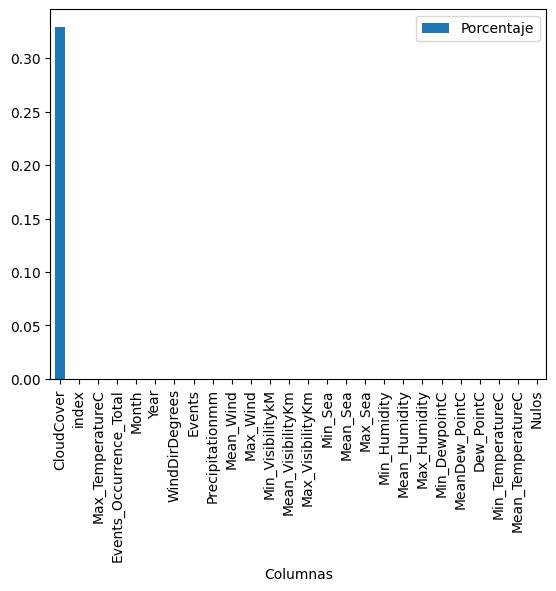

In [191]:
df_porcentajes_16.set_index('Columnas', inplace=True)
df_porcentajes_16.plot(kind='bar')

## Final DataSet

A cleaned dataset is crucial for machine learning as it ensures accurate and reliable model training and prediction. Cleaning the dataset involves removing duplicate or irrelevant data, handling missing values, correcting inconsistencies, and addressing outliers. By eliminating noise and inconsistencies, a cleaned dataset reduces the risk of biased or skewed results, leading to more robust and trustworthy machine learning models. Cleaned data also improves the model's ability to identify patterns and make accurate predictions by reducing the impact of irrelevant or misleading information. In summary, a cleaned final dataset forms the foundation for effective and meaningful machine learning outcomes.

In [192]:
data_final.reset_index()

,CET,index,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_Wind,Mean_Wind,Precipitationmm,CloudCover,Events,WindDirDegrees,Year,Month,Events_Occurrence_Total,Nulos
0,1997-01-02,1,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,...,26,8,0.00,5.0,Rain,143,1997,1,1140,0
1,1997-01-03,2,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,...,27,19,0.00,6.0,Rain-Snow,256,1997,1,33,1
2,1997-01-04,3,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,...,27,19,0.00,2.0,Nothing,284,1997,1,5014,0
3,1997-01-05,4,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,...,14,6,0.00,7.0,Extreme,2,1997,1,14,1
4,1997-01-07,6,2.0,0.0,-2.0,1.0,-1.0,-3.0,100.0,93.0,...,6,2,0.00,7.0,Extreme,43,1997,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,2015-12-27,6807,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,...,14,6,0.00,8.0,Fog,38,2015,12,233,1
3642,2015-12-28,6808,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,...,27,8,0.51,7.0,Rain,243,2015,12,1140,0
3643,2015-12-29,6809,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,...,14,8,2.03,5.0,Fog-Rain,190,2015,12,69,0
3644,2015-12-30,6810,9.0,8.0,6.0,7.0,6.0,5.0,93.0,87.0,...,14,5,0.00,6.0,Nothing,256,2015,12,5014,0


### Correlation Matrix

<ipython-input-193-dae3ac3010d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_final.corr(),annot = True, linewidths = 0.5, fmt = ".1f", ax = ax, cmap = "viridis")


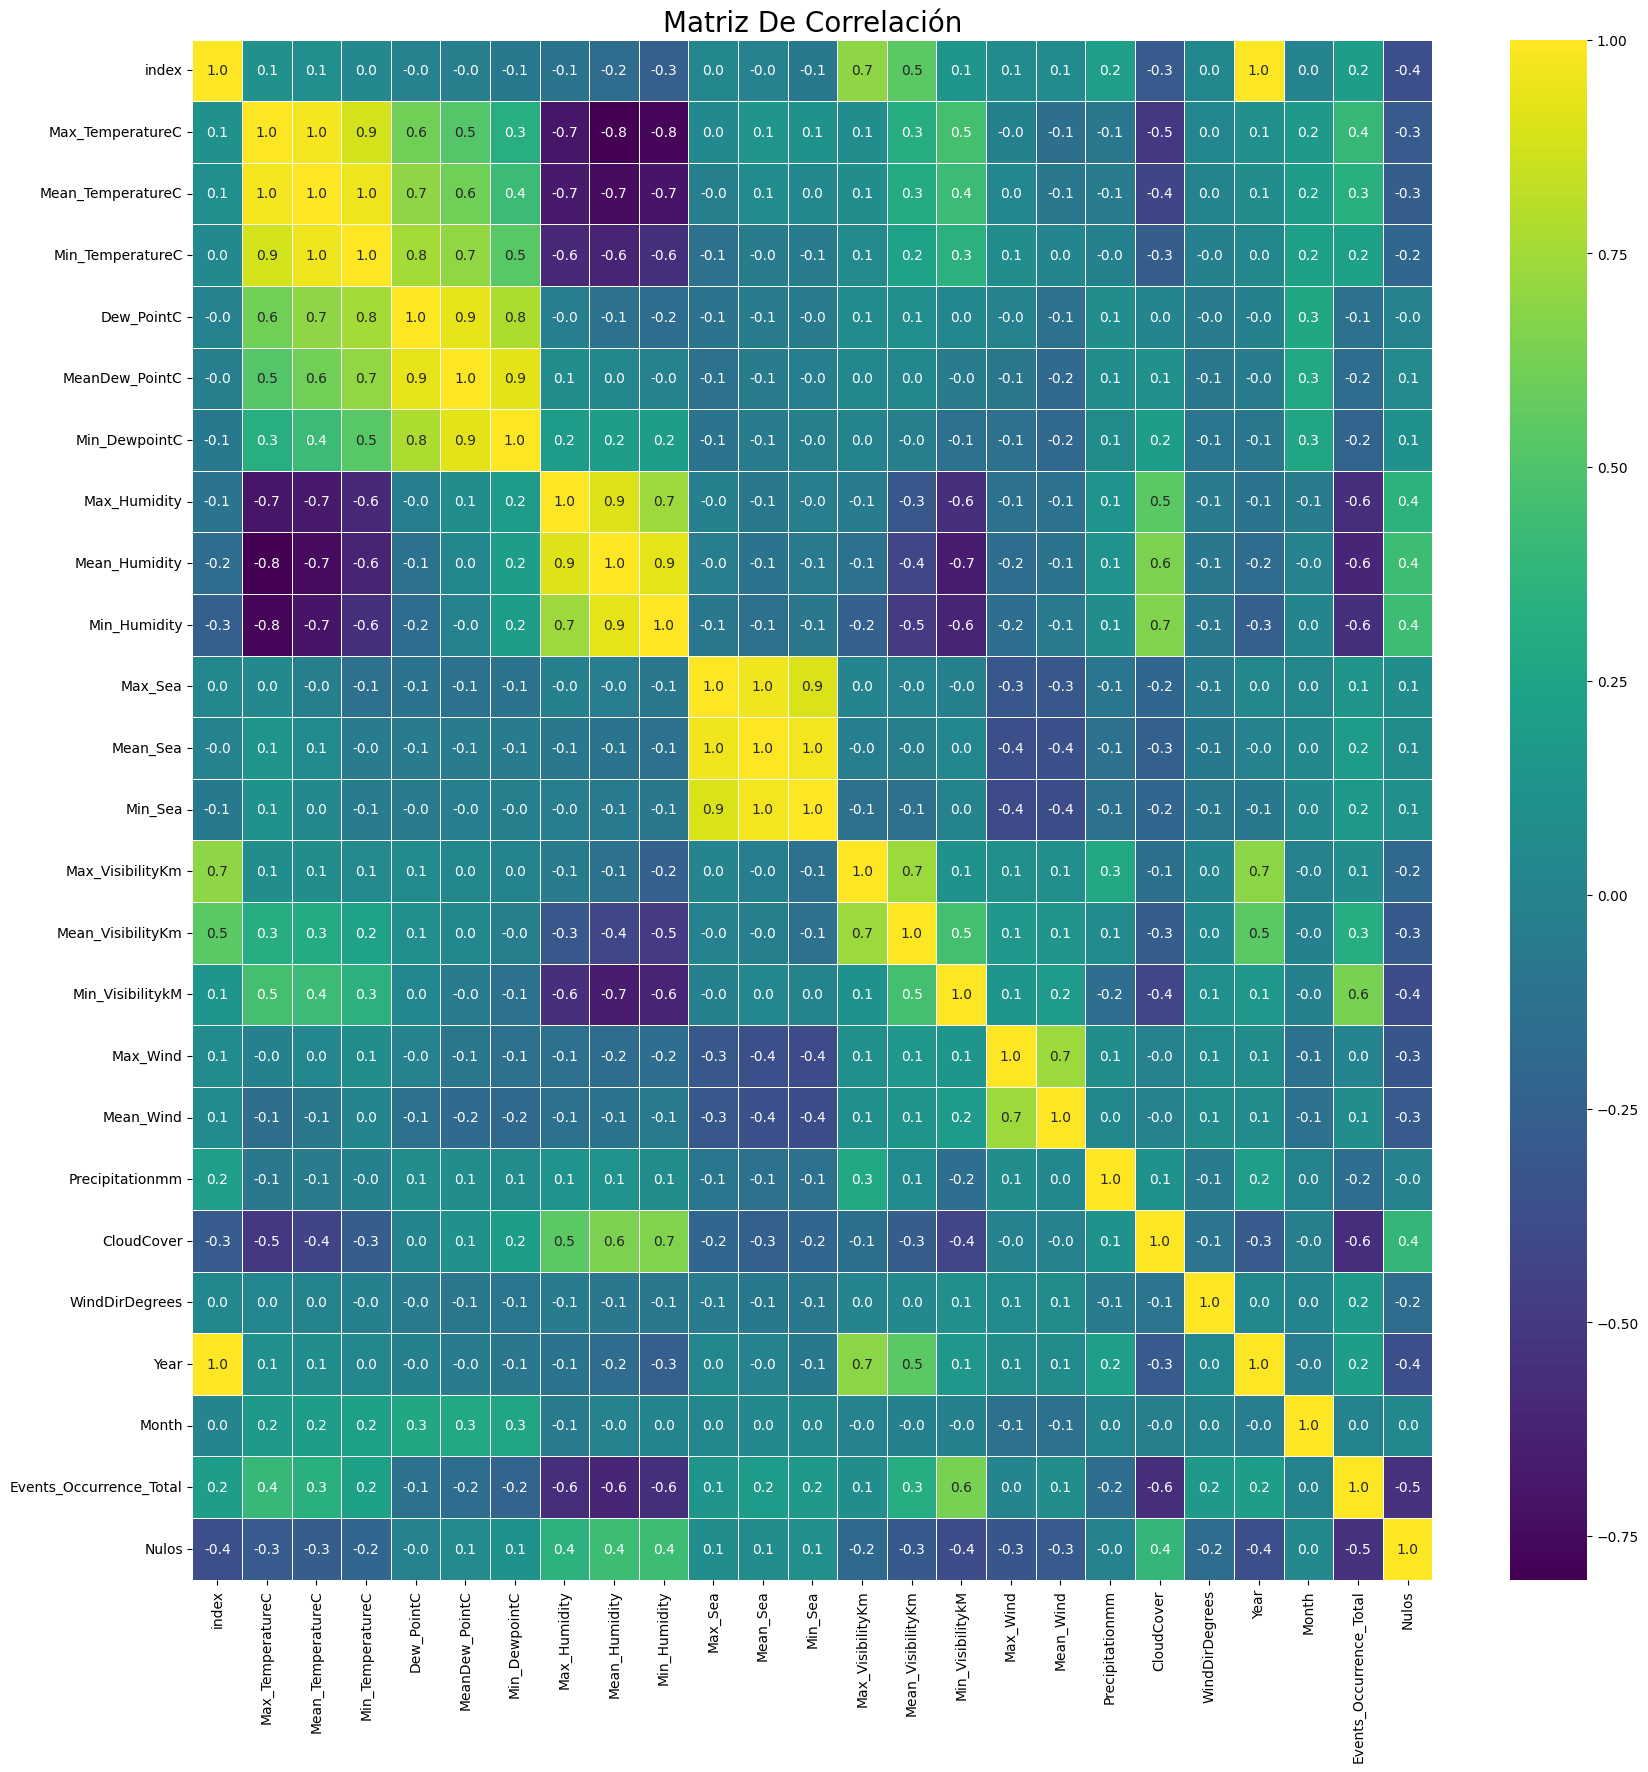

In [193]:
f,ax = plt.subplots(figsize = (20,20))
sns.heatmap(data_final.corr(),annot = True, linewidths = 0.5, fmt = ".1f", ax = ax, cmap = "viridis")
plt.title('Matriz De Correlación', size=20)
plt.show()

### Heatmap using Mean Temperatures

<ipython-input-194-f3121804a4fa>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_final_temp_sns = data_final_temp.pivot("year", "dayofyear", 'Mean_TemperatureC')


Text(0.5, 1.0, 'Heat map with Average Temperatures (1997-2015)')

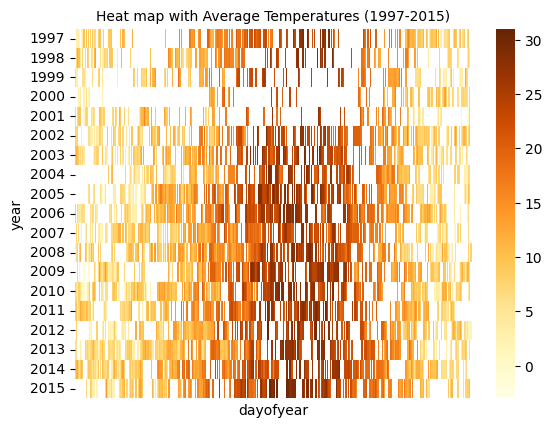

In [194]:
# Heat map with average temperatures by day of the year from 1997 to 2015
# Using the Final DataFrame
data_final_temp = data_final.copy().reset_index()

# Convert to date
data_final_temp.CET = pd.to_datetime(data_final_temp.CET, format='%Y-%m-%d')
data_final_temp['year'] = data_final_temp.CET.dt.year
data_final_temp['dayofyear'] = data_final_temp.CET.dt.dayofyear
data_final_temp_sns = data_final_temp.pivot("year", "dayofyear", 'Mean_TemperatureC')
sns.heatmap(data_final_temp_sns, xticklabels=False, cmap="YlOrBr")
plt.title('Heat map with Average Temperatures (1997-2015)', size=10)

### Original Heatmap vs Final DataSet Heatmap

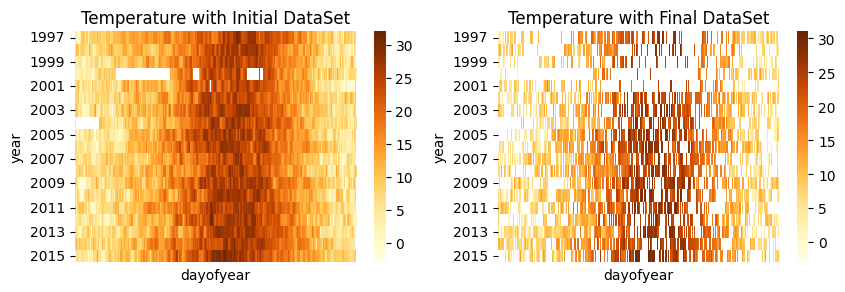

In [195]:
plt.figure(figsize = (10,3))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
sns.heatmap(dt_temp_sns, xticklabels=False, cmap="YlOrBr")
plt.title('Temperature with Initial DataSet')

plt.subplot(1, 2, 2) # row 1, col 2 index 2
sns.heatmap(data_final_temp_sns, xticklabels=False, cmap="YlOrBr")
plt.title('Temperature with Final DataSet')

plt.show()

### Comparing Sizes of Original DataSet vs Final DataSet

In [196]:
porcentaje_final = data_final.shape[0] / df.shape[0] * 100
porcentaje_final

53.523194362889015

- We are left with 53.5% of the initial dataframe
. Will it be a good approach?

The percentage of the initial dataset remaining after cleaning, in this case 53.5%, is just one factor to consider when evaluating the approach for machine learning. While a smaller dataset may raise concerns about the adequacy of the available information, it's not solely determinant of the approach's effectiveness.

The quality of the remaining data is equally important. If the cleaning process successfully removed irrelevant or noisy data, and the final dataset represents a representative and unbiased sample of the original data, then it can still be a good approach for machine learning. Additionally, the final dataset's size should be sufficient to capture the underlying patterns and relationships relevant to the machine learning task at hand.

## Machine Learning

### Sampling Techniques For Class Imbalance

- Cluster Centroids Oversampling
It involves creating synthetic samples for the minority class by searching for cluster centroids. The algorithm identifies the majority class clusters and generates synthetic samples in the feature space, placing them near the centroids of each cluster.

- SMOTE Oversampling
This algorithm works by selecting a minority class sample and identifying its k nearest neighbors. New synthetic samples are then generated by randomly selecting a neighbor and creating a synthetic sample along the line connecting the chosen sample and its neighbor.

### Algorithms for Null Values

- Decision Tree Classifier
This algorithm builds a tree-like model to make predictions or classifications. Recursively splits data based on features, selecting the most informative ones at each node. The process continues until a stopping criterion is met, resulting in a predictive tree structure.

- Random Forest Classifier
This algorithm creates a diverse set of decision trees through random feature selection and bootstrap sampling. The final prediction is made by aggregating the predictions from individual trees, resulting in higher accuracy and robustness.

- XGBoost Algorithm
This algorithm handles class imbalance by incorporating specific techniques. Assigns higher weights to minority class samples during decision tree construction. In addition, it provides parameters to adjust the balance between classes, improving the model's ability to handle unbalanced data sets.


### Decision Tree Classifier (No Oversampling)

The preliminary version of the model does not use oversampling techniques, so the predictions are simply not correct in most cases of minor events due to class imbalance. In this case, it was possible to approach the problem from a simple approach in order to emphasize the impact of class imbalance. In this case, there is a prediction with high levels of error for those with a lower occurrence compared to the majority.

In [197]:
df_ml = data_final.copy()
df_ml = df_ml.drop(columns=['index', 'Events_Occurrence_Total', 'Nulos'])#, 'Year', 'Month'])
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3646 entries, 1997-01-02 to 2015-12-31
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Max_TemperatureC   3646 non-null   float64
 1   Mean_TemperatureC  3646 non-null   float64
 2   Min_TemperatureC   3646 non-null   float64
 3   Dew_PointC         3646 non-null   float64
 4   MeanDew_PointC     3646 non-null   float64
 5   Min_DewpointC      3646 non-null   float64
 6   Max_Humidity       3646 non-null   float64
 7   Mean_Humidity      3646 non-null   float64
 8   Min_Humidity       3646 non-null   float64
 9   Max_Sea            3646 non-null   int64  
 10  Mean_Sea           3646 non-null   int64  
 11  Min_Sea            3646 non-null   int64  
 12  Max_VisibilityKm   3646 non-null   float64
 13  Mean_VisibilityKm  3646 non-null   float64
 14  Min_VisibilitykM   3646 non-null   float64
 15  Max_Wind           3646 non-null   int64  
 16  Mean_W

In [198]:
df_ml.columns.values

array(['Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea', 'Mean_Sea', 'Min_Sea',
       'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM',
       'Max_Wind', 'Mean_Wind', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'Year', 'Month'], dtype=object)

In [199]:
le = preprocessing.LabelEncoder()
df_ml['Events'] = le.fit_transform(df_ml['Events'])

In [200]:
X = df_ml.drop(['Events'],axis=1)
y = df_ml[['Events']]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [202]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [203]:
predictions_DTC = dtc.predict(X_test)
print(predictions_DTC[:10])

[4 3 3 4 3 6 3 6 3 3]


In [204]:
print(accuracy_score(y_test, predictions_DTC))

0.6821917808219178


In [205]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_DTC)

1.326027397260274

In [206]:
y_pred=dtc.predict(X_test)
le.inverse_transform(y_pred[:30])

array(['Rain', 'Nothing', 'Nothing', 'Rain', 'Nothing',
       'Rain-Thunderstorm', 'Nothing', 'Rain-Thunderstorm', 'Nothing',
       'Nothing', 'Rain', 'Rain', 'Rain', 'Nothing', 'Rain', 'Nothing',
       'Nothing', 'Fog-Rain', 'Nothing', 'Rain', 'Nothing', 'Rain',
       'Rain-Thunderstorm', 'Rain', 'Rain', 'Nothing', 'Rain', 'Nothing',
       'Rain', 'Nothing'], dtype=object)

In [207]:
event_names = pd.DataFrame(data_final.Events.unique(), columns=['Evento'])
event_names["Numero"] = df_ml.Events.unique()

In [208]:
event_names_sort = event_names.sort_values(by='Evento', ascending=True)
event_names_sort

,Evento,Numero
3,Extreme,0
4,Fog,1
5,Fog-Rain,2
2,Nothing,3
0,Rain,4
1,Rain-Snow,5
6,Rain-Thunderstorm,6
7,Thunderstorm,7


Evaluating the Model

- Classification Report: it provides a comprehensive evaluation of a model's performance. It includes key metrics such as precision, recall, F1 score, and accuracy, which offer insights into the model's predictive capabilities. The report helps assess the model's ability to correctly identify and classify different classes, uncovering potential issues like imbalanced data or biased predictions. It aids in understanding the model's strengths and weaknesses, facilitating informed decision-making for model refinement, feature selection, or algorithm selection. The classification report serves as a critical tool for assessing and benchmarking the effectiveness of classification models in various domains.

In [209]:
print(classification_report(y_test, y_pred, target_names=event_names_sort.Evento))
print("Test Score : {}".format(dtc.score(X_test, y_test)))

                   precision    recall  f1-score   support

          Extreme       0.00      0.00      0.00         6
              Fog       0.67      0.66      0.67        44
         Fog-Rain       0.06      0.11      0.08         9
          Nothing       0.81      0.81      0.81       367
             Rain       0.65      0.64      0.65       235
        Rain-Snow       0.14      0.17      0.15         6
Rain-Thunderstorm       0.34      0.39      0.36        49
     Thunderstorm       0.11      0.07      0.09        14

         accuracy                           0.68       730
        macro avg       0.35      0.36      0.35       730
     weighted avg       0.69      0.68      0.68       730

Test Score : 0.6821917808219178


- Confusion Matrix: it provides a comprehensive evaluation of model performance by displaying the true positives, true negatives, false positives, and false negatives. It allows for a detailed analysis of the model's accuracy, precision, recall, and F1-score. The confusion matrix aids in identifying any imbalances or biases in predictions and helps optimize the model by fine-tuning thresholds or adjusting the classification approach. It also serves as a foundation for calculating various evaluation metrics, such as accuracy, precision, recall, and specificity, enabling informed decisions about the model's effectiveness and potential improvements.

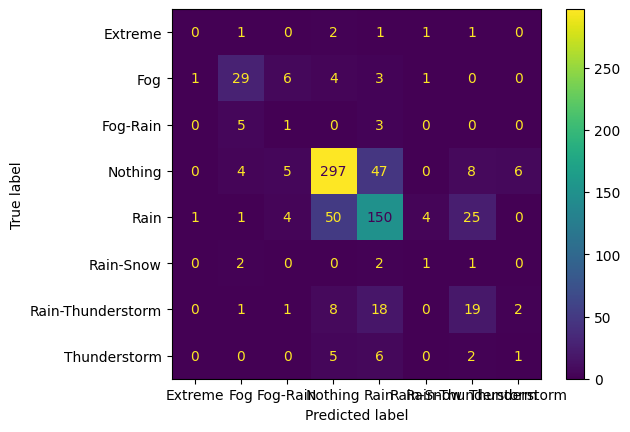

In [210]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=event_names_sort.Evento)

### Decision Tree Classifier (Oversampling)

The second version of the algorithm took a perspective more focused on using measures such as oversampling, in which Borderline-SMOTE was used. This is used to address class imbalance in machine learning. It identifies minority class samples near the decision limit and applies SMOTE to create synthetic samples, emphasizing those instances that are more difficult to classify accurately. To compare the initial results, the same Decision Tree Classifier Algorithm was used. In particular, it is possible to highlight that some events have a higher prediction, however, they are still very low values.

In [211]:
# Cluster Centroids Oversample
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train, y_train)

# Model Training
dtc.fit(X_cc, y_cc)

# Results
y_pred_cluster = dtc.predict(X_test)

target_names = ['Extreme', 'Fog', 'Fog-Rain', 'Nothing', 'Rain', 'Rain-Snow', 'Rain-Thunderstorm', 'Thunderstorm']
print(classification_report_imbalanced(y_test, y_pred_cluster, target_names=target_names))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

                         pre       rec       spe        f1       geo       iba       sup

          Extreme       0.02      0.67      0.73      0.04      0.70      0.48         6
              Fog       0.16      0.11      0.96      0.13      0.33      0.10        44
         Fog-Rain       0.07      0.56      0.90      0.12      0.71      0.48         9
          Nothing       0.50      0.00      1.00      0.01      0.05      0.00       367
             Rain       0.72      0.06      0.99      0.10      0.23      0.05       235
        Rain-Snow       0.03      0.50      0.84      0.05      0.65      0.41         6
Rain-Thunderstorm       0.30      0.35      0.94      0.32      0.57      0.31        49
     Thunderstorm       0.05      0.86      0.69      0.10      0.77      0.60        14

      avg / total       0.52      0.08      0.98      0.07      0.19      0.07       730



In [212]:
# SMOTE Oversample
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

# Model Training
dtc.fit(X_sm, y_sm)

# Results
y_pred_smote = dtc.predict(X_test)

target_names = ['Extreme', 'Fog', 'Fog-Rain', 'Nothing', 'Rain', 'Rain-Snow', 'Rain-Thunderstorm', 'Thunderstorm']
print(classification_report_imbalanced(y_test, y_pred_smote, target_names=target_names))

                         pre       rec       spe        f1       geo       iba       sup

          Extreme       0.09      0.17      0.99      0.12      0.41      0.15         6
              Fog       0.63      0.77      0.97      0.69      0.87      0.74        44
         Fog-Rain       0.19      0.44      0.98      0.27      0.66      0.41         9
          Nothing       0.83      0.77      0.84      0.79      0.80      0.64       367
             Rain       0.67      0.58      0.86      0.62      0.71      0.49       235
        Rain-Snow       0.11      0.17      0.99      0.13      0.41      0.15         6
Rain-Thunderstorm       0.29      0.39      0.93      0.33      0.60      0.34        49
     Thunderstorm       0.08      0.14      0.97      0.11      0.37      0.13        14

      avg / total       0.69      0.66      0.87      0.67      0.75      0.55       730



In [213]:
# Borderline-SMOTE Oversample
bl_smote = BorderlineSMOTE()
X_bl_smote, y_bl_smote = bl_smote.fit_resample(X_train, y_train)

# Model Training
dtc.fit(X_bl_smote, y_bl_smote)

# Results
y_pred_bl_smote = dtc.predict(X_test)

target_names = ['Extreme', 'Fog', 'Fog-Rain', 'Nothing', 'Rain', 'Rain-Snow', 'Rain-Thunderstorm', 'Thunderstorm']
print(classification_report_imbalanced(y_test, y_pred_bl_smote, target_names=target_names))

                         pre       rec       spe        f1       geo       iba       sup

          Extreme       0.00      0.00      0.99      0.00      0.00      0.00         6
              Fog       0.62      0.73      0.97      0.67      0.84      0.69        44
         Fog-Rain       0.13      0.22      0.98      0.17      0.47      0.20         9
          Nothing       0.82      0.80      0.82      0.81      0.81      0.66       367
             Rain       0.67      0.60      0.86      0.63      0.72      0.50       235
        Rain-Snow       0.18      0.33      0.99      0.24      0.57      0.31         6
Rain-Thunderstorm       0.34      0.43      0.94      0.38      0.64      0.38        49
     Thunderstorm       0.12      0.14      0.98      0.13      0.37      0.13        14

      avg / total       0.69      0.68      0.86      0.68      0.75      0.57       730



### Random Forest (Oversampling)

The third version of the algorithm took the same perspective using oversampling techniques, in which Borderline-SMOTE was also used. In this case, there is a higher prediction in the smaller classes, so it is possible to infer that for this dataset, the use of Random Forest was better than that of Decision Tree Classifier. This better prediction compared to the other algorithm may be due to Random Forest combining multiple decision trees and aggregating their predictions, which reduces overfitting and increases generalizability.

In [214]:
# SMOTE Oversample
smo = SMOTE()
rfc = RandomForestClassifier()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

# Model Training
rfc.fit(X_sm, y_sm)

# Results
y_pred_smote = rfc.predict(X_test)

target_names = ['Extreme', 'Fog', 'Fog-Rain', 'Nothing', 'Rain', 'Rain-Snow', 'Rain-Thunderstorm', 'Thunderstorm']
print(classification_report_imbalanced(y_test, y_pred_smote, target_names=target_names))

<ipython-input-214-26efae2bee30>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_sm, y_sm)


                         pre       rec       spe        f1       geo       iba       sup

          Extreme       0.00      0.00      1.00      0.00      0.00      0.00         6
              Fog       0.70      0.86      0.98      0.78      0.92      0.83        44
         Fog-Rain       0.15      0.22      0.98      0.18      0.47      0.20         9
          Nothing       0.86      0.90      0.85      0.88      0.87      0.77       367
             Rain       0.79      0.74      0.91      0.76      0.82      0.66       235
        Rain-Snow       0.33      0.33      0.99      0.33      0.58      0.31         6
Rain-Thunderstorm       0.51      0.47      0.97      0.49      0.67      0.43        49
     Thunderstorm       0.33      0.14      0.99      0.20      0.38      0.13        14

      avg / total       0.77      0.78      0.89      0.78      0.82      0.68       730



In [215]:
# Borderline-SMOTE Oversample
bl_smote = BorderlineSMOTE()
rfc = RandomForestClassifier()
X_bl_smote, y_bl_smote = bl_smote.fit_resample(X_train, y_train)

# Model Training
rfc.fit(X_bl_smote, y_bl_smote)

# Results
y_pred_bl_smote = rfc.predict(X_test)

target_names = ['Extreme', 'Fog', 'Fog-Rain', 'Nothing', 'Rain', 'Rain-Snow', 'Rain-Thunderstorm', 'Thunderstorm']
print(classification_report_imbalanced(y_test, y_pred_bl_smote, target_names=target_names))

<ipython-input-215-2fe425c98df7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_bl_smote, y_bl_smote)


                         pre       rec       spe        f1       geo       iba       sup

          Extreme       0.00      0.00      1.00      0.00      0.00      0.00         6
              Fog       0.75      0.93      0.98      0.83      0.96      0.91        44
         Fog-Rain       0.10      0.11      0.99      0.11      0.33      0.10         9
          Nothing       0.87      0.89      0.86      0.88      0.88      0.77       367
             Rain       0.77      0.76      0.89      0.76      0.82      0.67       235
        Rain-Snow       0.62      0.83      1.00      0.71      0.91      0.82         6
Rain-Thunderstorm       0.50      0.43      0.97      0.46      0.64      0.39        49
     Thunderstorm       0.20      0.07      0.99      0.11      0.27      0.06        14

      avg / total       0.77      0.79      0.89      0.78      0.82      0.69       730



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XGBoost (Not Oversampling)

The fourth version of the model used the XGBoost Algorithm and the dataset without oversampling manipulation. This was possible since the algorithm can assign higher weights to minority class samples. In this case, there is a better prediction in most of the minor classes, so it is possible to infer that the use of XGBoost was better for this case, and has a better prediction. XGBoost combines the strengths of the previous algorithms, handling non-linear relationships, handling missing values and providing better regularization.

In [216]:
xgb = XGBClassifier


xgb_model = xgb(booster='gbtree',
			objective='binary:logistic',
			max_depth=12, learning_rate=0.1,
			n_estimators=10,
			random_state=101,
			n_jobs=-1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [217]:
xgb_predict=xgb_model.predict(X_test)
xgb_predict[:30]

array([4, 4, 3, 4, 3, 3, 3, 4, 3, 3, 5, 4, 4, 3, 4, 3, 4, 4, 3, 4, 3, 4,
       4, 3, 6, 3, 4, 3, 4, 3])

In [218]:
print(classification_report(y_test,xgb_predict, target_names=event_names_sort.Evento))

                   precision    recall  f1-score   support

          Extreme       0.00      0.00      0.00         6
              Fog       0.75      0.89      0.81        44
         Fog-Rain       1.00      0.11      0.20         9
          Nothing       0.84      0.93      0.89       367
             Rain       0.79      0.78      0.79       235
        Rain-Snow       0.57      0.67      0.62         6
Rain-Thunderstorm       0.53      0.33      0.41        49
     Thunderstorm       0.50      0.07      0.12        14

         accuracy                           0.80       730
        macro avg       0.62      0.47      0.48       730
     weighted avg       0.79      0.80      0.79       730



In [219]:
print(accuracy_score(y_test, xgb_predict))

0.8041095890410959


## 2021-2023 Predictions (Random Forest + BL-SMOTE)

An alternative approach that was given to this project was the possibility of generating predictions with other datasets. In this case Visual Crossing was used to generate a climate dataset in the same location (Barajas, Madrid) in the range from January 2021 to June 2023. Due to the nature of obtaining the data, there were different columns from each other, so it was decided to include only those variables that shared the same name between the two datasets.

Another peculiarity of the new data was that they only had the average values, and unlike this, the original dataset also had maximum and minimum values, so a new dataset was created only with average values. From this, it was possible to use Random Forest to predict the data from this new dataset, having a prediction similar to what was actually present at the airport.

In [220]:
X_test_2023 = pd.read_csv("/content/drive/MyDrive/Skills Tech/Proyectos/Proyecto Final/Notebook/Datasets/Barajas_2021_2023.csv",low_memory=False)
X_test_2023.CET = pd.to_datetime(X_test_2023.CET, format='%d/%m/%Y')
X_test_2023 = X_test_2023.rename(columns={" Events": "Events"})

In [221]:
X_test_2023["Events"] = X_test_2023["Events"].fillna("Nothing")

In [222]:
X_test_2023 = X_test_2023.replace({'Events': "rain,snow"}, "Extreme")
X_test_2023 = X_test_2023.replace({'Events': "rain"}, "Rain")
X_test_2023 = X_test_2023.set_index('CET')

In [223]:
X_test_2023.columns = [each.split()[0]+"_"+each.split()[1] if (len(each.split()) > 1) else each for each in X_test_2023.columns]
X_test_2023.rename(columns = {" CloudCover":"CloudCover"," Events":"Events"}, inplace = True)

In [224]:
X_test_2023 = X_test_2023.drop(columns=['Max_Gust','Events'])

In [225]:
df_ml_2023 = data_final.copy()
df_ml_2023 = df_ml_2023.drop(columns=['Events_Occurrence_Total', 'Nulos', 'Dew_PointC', 'Min_DewpointC',
                                     'Max_Humidity', 'Min_Humidity', 'Max_Sea', 'Min_Sea',
                                     'Max_VisibilityKm', 'Min_Humidity', 'Max_Sea', 'Min_Sea',
                                     'Max_VisibilityKm', 'Min_VisibilitykM', 'Max_Wind', 'Year', 'Month'])

In [226]:
le_3 = preprocessing.LabelEncoder()
df_ml_2023['Events'] = le_3.fit_transform(df_ml_2023['Events'])

In [227]:
X_2 = df_ml_2023.drop(['Events'],axis=1)
y_2 = df_ml_2023[['Events']]

In [228]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.20, random_state=1)

In [229]:
X_bl_smote_2, y_bl_smote_2 = bl_smote.fit_resample(X_train_2, y_train_2)

rfc_2023 = RandomForestClassifier()

# Model Training
rfc_2023.fit(X_bl_smote_2, y_bl_smote_2)

# Results
y_pred_bl_smote_2 = rfc_2023.predict(X_test_2023)

le.inverse_transform(y_pred_bl_smote_2[:30])

<ipython-input-229-cf71c6042092>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc_2023.fit(X_bl_smote_2, y_bl_smote_2)


array(['Rain', 'Nothing', 'Rain', 'Rain-Snow', 'Rain', 'Rain',
       'Rain-Snow', 'Rain-Snow', 'Rain-Snow', 'Rain-Snow', 'Rain',
       'Nothing', 'Nothing', 'Nothing', 'Rain', 'Fog', 'Rain', 'Rain',
       'Rain', 'Fog', 'Rain', 'Rain', 'Rain', 'Rain', 'Rain', 'Nothing',
       'Rain', 'Fog', 'Rain', 'Rain'], dtype=object)

In [230]:
print("Test Score : {}".format(rfc_2023.score(X_test_2, y_test_2)))

Test Score : 0.7547945205479452


## API using Gradio.app

Gradio.app enables the quick creation and deployment of customizable web interfaces for machine learning models. It allows developers and data scientists to easily showcase their models' functionality by generating user-friendly interfaces with interactive input and output elements. This library also simplifies the process of building interactive demos, making it accessible for non-technical users to interact with machine learning models and understand their capabilities.

In [231]:
def predict_weather(f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23):

  input_feature = np.array([[f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23]])

  if input_feature is not None:
      if f1 == "Decision Trees":
        model = dtc.predict(input_feature)

      elif f1 == "Random Forest":
        model = rfc.predict(input_feature)

      elif f1 == "XGBoost":
        model = xgb_model.predict(input_feature)

      elif f1 is None:
        return "Please select an algorithm to use."

  else:
    pass

  return "The forecasted weather using the " + str(f1) + " algorithm is " + str(le.inverse_transform(model[[0]]))

In [232]:
# Interface Inputs
inputs_app = [gr.Radio(["Decision Trees", "Random Forest", "XGBoost"], label="Choose the algorithm to use"),
              gr.Slider(0,41, step=0.05, label='Max_TemperatureC'),
              gr.Slider(-3,31, step=0.05, label='Mean_TemperatureC'),
              gr.Slider(-10,25, step=0.05, label='Min_TemperatureC'),
              gr.Slider(-10,20, step=0.5, label='Dew_PointC'),
              gr.Slider(-12,16, step=0.05, label='MeanDew_PointC'),
              gr.Slider(-18,14, step=0.05, label='Min_DewpointC'),
              gr.Slider(28,100, step=0.05, label='Max_Humidity'),
              gr.Slider(16,100, step=0.05, label='Mean_Humidity'),
              gr.Slider(4,100, step=0.05, label='Min_Humidity'),
              gr.Slider(994,1041, step=1, label='Max_Sea'),
              gr.Slider(986,1039, step=1, label='Mean_Sea'),
              gr.Slider(965,1038, step=1, label='Min_Sea'),
              gr.Slider(1,31, step=0.05, label='Max_VisibilityKm'),
              gr.Slider(0,31, step=0.05, label='Mean_VisibilityKm'),
              gr.Slider(0,31, step=0.05, label='Min_VisibilitykM'),
              gr.Slider(3,132, step=0.05, label='Max_Wind'),
              gr.Slider(0,39, step=0.05, label='Mean_Wind'),
              gr.Slider(0,32, step=0.01, label='Precipitationmm'),
              gr.Slider(0,8, step=0.1, label='CloudCover'),
              gr.Slider(0,360, step=1, label='WindDirDegrees'),
              gr.Slider(1997,2015, step=1, label='Year'),
              gr.Slider(1,12, step=1, label='Month')]

# Interface Output
outputs_app = ["text"]

# Building the Gradio Interface
weather_predictor_app = gr.Interface(fn=predict_weather,
                                    inputs=inputs_app,
                                    outputs=outputs_app,
                                    allow_flagging="manual",
                                    live=True,
                                    examples = [["Decision Trees", 7,4,2,5,3,2,100,95,76,1010,1008,1004,10,9,4,13,6,0,6,229,1997,1],
                                                ["Random Forest", 37,28,18,7,4,-2,43,18,4,1019,1016,1010,31,29,16,29,13,0,6,244,2015,7],
                                                ["XGBoost", 16,12,8,11,7,4,94,69,52,1014,1012,1009,10,10,10,14,5,0,5,35,2004,10]],
                                    title = "Weather Prediction (Barajas, Madrid)",
                                    description="Enter parameters using sliders provided to predict the weather.",
                                    css="footer {visibility: hidden}"
                                    )

/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:271: UserWarning: api_name predict already exists, using predict_1
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:271: UserWarning: api_name predict already exists, using predict_2
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:271: UserWarning: api_name predict already exists, using predict_3
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:271: UserWarning: api_name predict already exists, using predict_4
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local/lib/python3.10/dist-packages/gradio/blocks.py:271: UserWarning: api_name predict already exists, using predict_5
  warnings.warn(f"api_name {api_name} already exists, using {api_name_}")
/usr/local

In [233]:
#weather_predictor_app.close() # To restart the server
weather_predictor_app.launch(share=True)#, auth = ("skills", "tech"), auth_message = "Enter your username and password")

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://919211598e6f4de7a8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Deploying the Model

### Dumping the Models into Files (Joblib)

Joblib allows us to save the entire state of a trained model, including the learned parameters, hyperparameters, and other relevant attributes. By exporting models with joblib, it is possible to easily preserve the trained model's state, ensuring reproducibility and eliminating the need to retrain the model from scratch each time it is used. With joblib, it is possible to dump the model to a file and then load the file for deployment. (It is also possible to use Pickle, although it is not recommended).

In [234]:
# Using Joblib
dump(rfc, '/content/drive/MyDrive/Skills Tech/Proyectos/Proyecto Final/Notebook/Models/rfc_model.sav')
dump(dtc, '/content/drive/MyDrive/Skills Tech/Proyectos/Proyecto Final/Notebook/Models/dtc_model.sav')
dump(xgb_model, '/content/drive/MyDrive/Skills Tech/Proyectos/Proyecto Final/Notebook/Models/xgb_model.sav')

['/content/drive/MyDrive/Skills Tech/Proyectos/Proyecto Final/Notebook/Models/xgb_model.sav']

### Deployment on Huggingface

[Weather Prediction (Barajas, Madrid)](https://huggingface.co/spaces/Wichox/skillstech-weather-forecasting)

While it is not directly integrated, Gradio and Huggingface can be used together to build interactive interfaces for the models previously generated. Huggingface serves as a platform that allows users to input data through the web interface and receive predictions or outputs from the model. By combining the simplicity and flexibility of Gradio with the power of Huggingface, it is possible for developers to create user-friendly applications and demos that leverage the cutting-edge capabilities of a machine learning model.

In [235]:
gr.Interface.load("spaces/Wichox/skillstech-weather-forecasting").launch(share=True)

<ipython-input-235-90d55ce8104c>:1: GradioDeprecationWarning: gr.Interface.load() will be deprecated. Use gr.load() instead.
  gr.Interface.load("spaces/Wichox/skillstech-weather-forecasting").launch(share=True)


Fetching Space from: https://huggingface.co/spaces/Wichox/skillstech-weather-forecasting
Loaded as API: https://wichox-skillstech-weather-forecasting.hf.space ✔
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a9d52866f26b7e2b88.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Conclusion

It is possible to consider that the project was of great help to understand that the nature of the data collection is not always the most optimal, since there are many null values, junk information, among other issues that are irrelevant for the analysis depending on the perspective that is taken.

In particular, it is possible to consider that one of the biggest challenges in the future will be to find a better solution for those datasets that have a majority of null values, since although a result was reached in this case, it was not the most optimal, so it would be needed have to analyze other methodologies that allow us to have a better result for any type of dataset.

### Future Considerations

- It is crucial to assess the reasons behind the high percentage of missing values. Understanding the nature and patterns of missingness can guide imputation techniques or influence feature engineering decisions.

- Exploring alternative data collection methods or sources to supplement or replace missing data may be necessary.

- Careful feature selection becomes essential to ensure that variables with substantial missingness do not introduce bias or spurious correlations.

- Employing appropriate imputation strategies or exploring advanced techniques like multiple imputation can help mitigate the impact of missing data on the model's performance and validity.